In [1]:
import inspect
import warnings

warnings.filterwarnings("ignore")

import umap
from pmlb import fetch_data  # , classification_dataset_names
from scipy.stats import entropy, mannwhitneyu
from seaborn import scatterplot
from sklearn.model_selection import train_test_split

from gower.gower_dist import *

pd.options.display.float_format = '{:.6f}'.format

plt.style.use("dark_background")

optimize = optimize_agglo

### This is a battery of tests to see how well various clustering evaluation metrics perform on a variety of datasets.

The datasets are all from the Penn Machine Learning Benchmark.

Each dataset is capped at 1,000 rows (stratified `train_test_split` with `random_state=42`).

The target variable is either binary or categorical.

### Dataset Selection:

All datasets were run through the `optimize_agglo` function with the default parameters.

If the maximum possible Gini-weighted average of Adjusted Mutual Information and Adjusted Rand Index across the grid of distance threshold values were greater than 0.4, the dataset was included in the analysis.

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

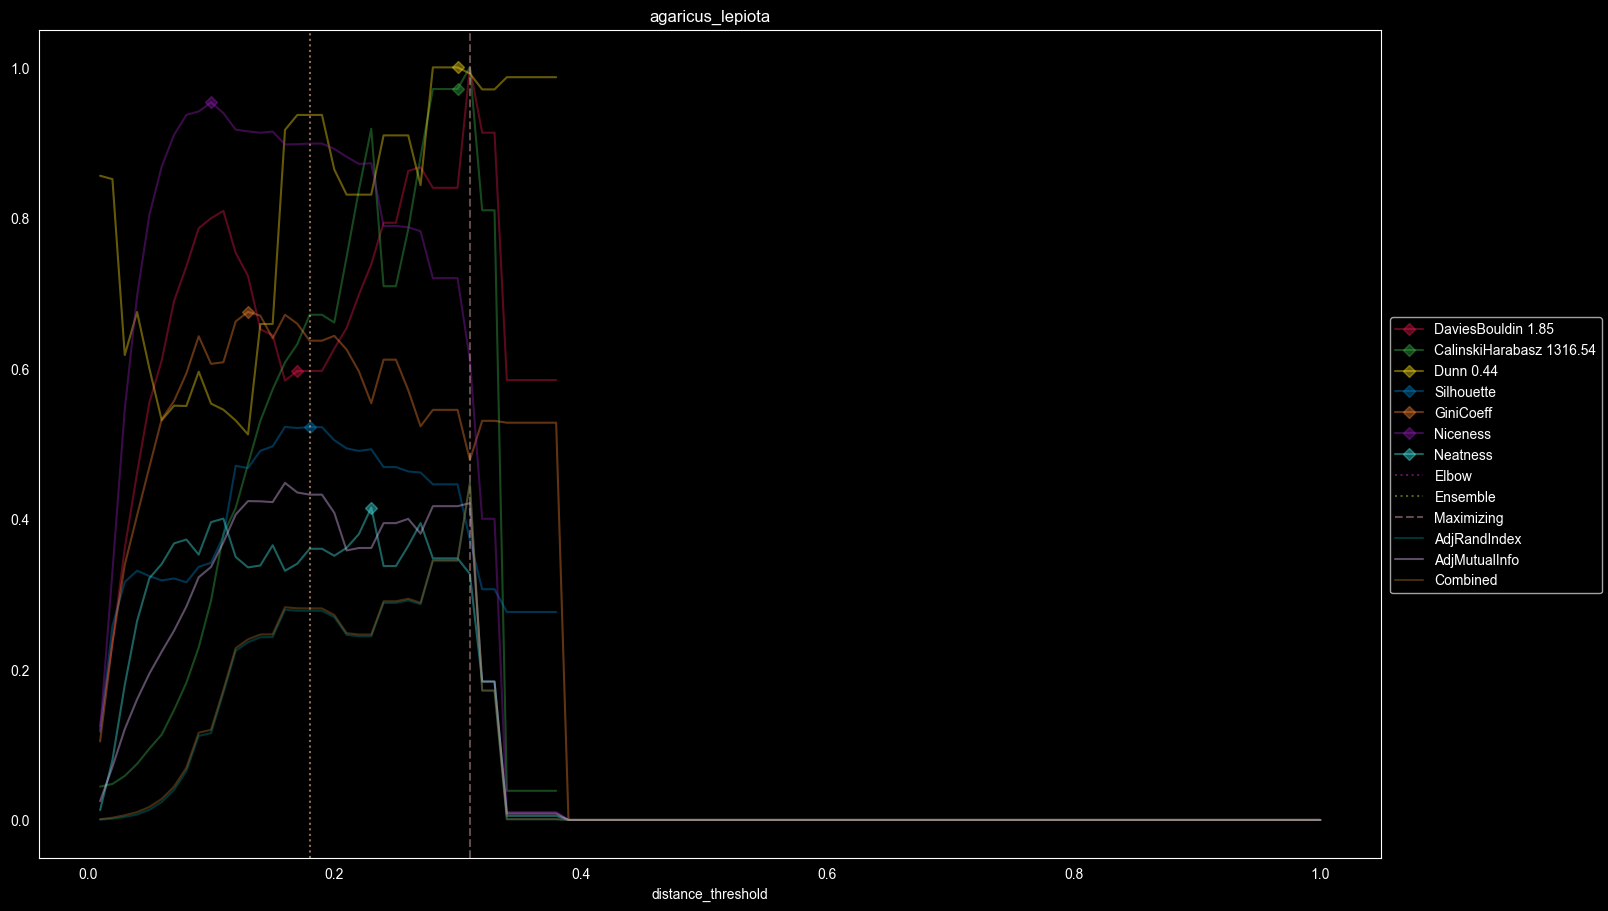

{'Silhouette': 0.3722002036700513, 'Niceness': 0.6113730683602037, 'GiniCoeff': 0.47827246067715273, 'Neatness': 0.3268788425302213, 'sample': {'distance_threshold': 0.31, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {5: 1, 172: 1, 244: 1, 579: 1}, 'DaviesBouldin': 1.8454256921292134, 'CalinskiHarabasz': 1316.535322338676, 'Dunn': 0.43766185020989407, 'AdjRandIndex': 0.4480533963864197, 'AdjMutualInfo': 0.42097038375191287, 'Combined': 0.447504660326643}
0    519
1    481
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     22.000000
k      2.000000
e      0.692425
g      0.020261
Name: agaricus_lepiota, dtype: float64


  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/841 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

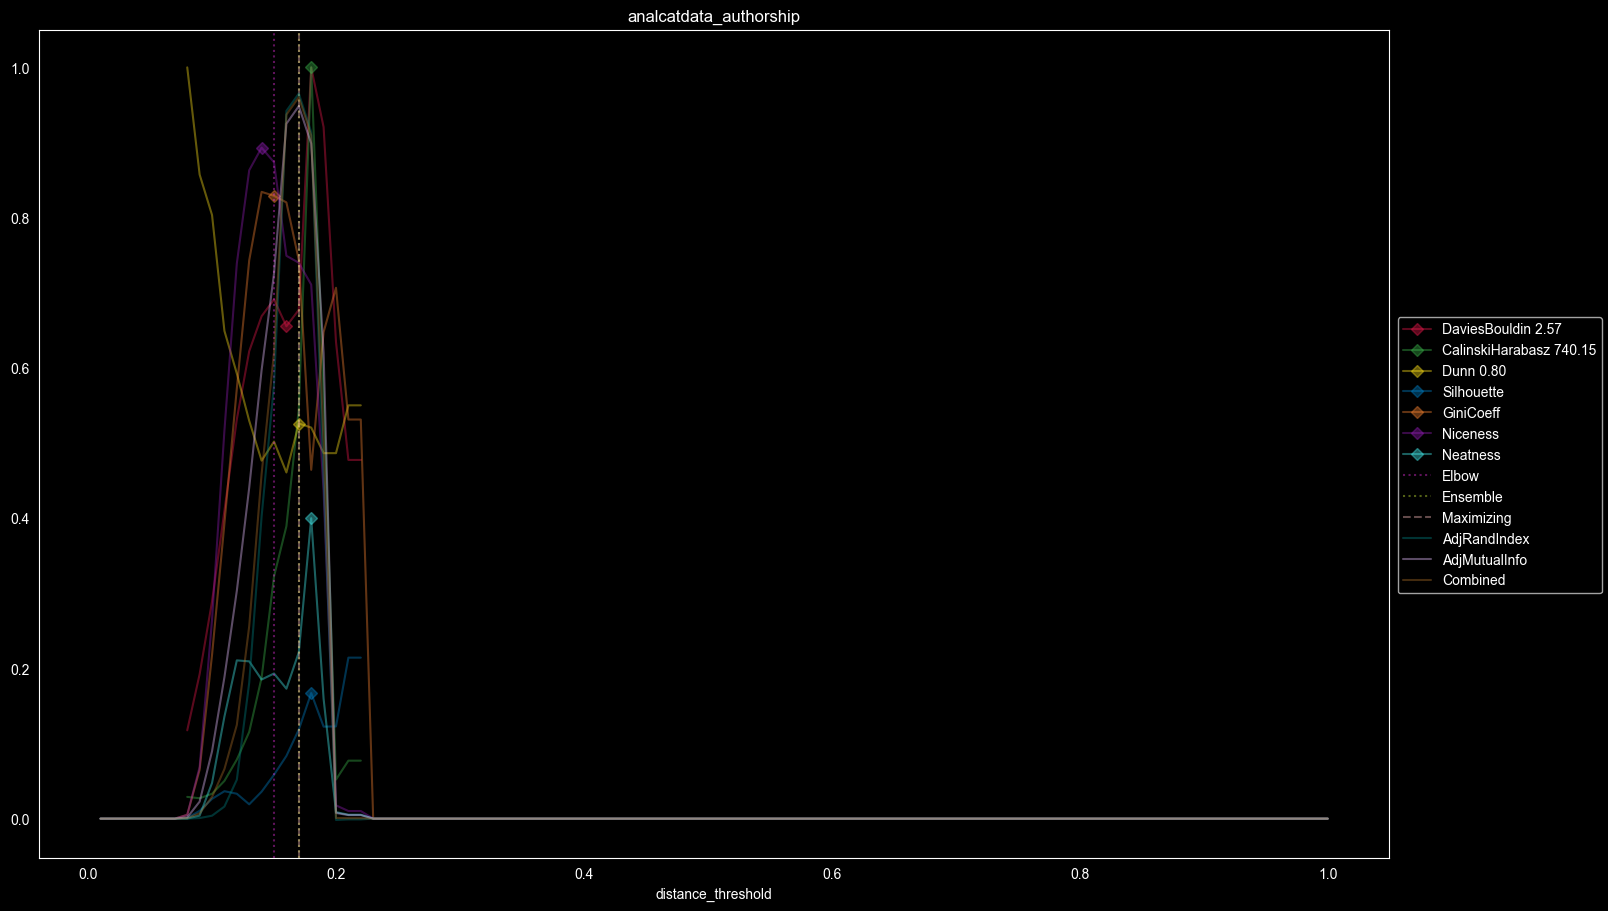

{'Silhouette': 0.1185618346111769, 'Niceness': 0.7398921369444451, 'GiniCoeff': 0.7434948979591837, 'Neatness': 0.22139724973004826, 'sample': {'distance_threshold': 0.17, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 3, 3: 2, 4: 1, 54: 1, 174: 1, 287: 1, 313: 1}, 'DaviesBouldin': 1.737785717400008, 'CalinskiHarabasz': 403.6457661312185, 'Dunn': 0.42162009646923465, 'AdjRandIndex': 0.965156953835179, 'AdjMutualInfo': 0.9484079917203584, 'Combined': 0.9603021048038103}
0    317
1    296
3    173
2     55
Name: count, dtype: int64
Dataset Summary
n   841.000000
d    70.000000
k     4.000000
e     1.238942
g     0.289860
Name: analcatdata_authorship, dtype: float64


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/699 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

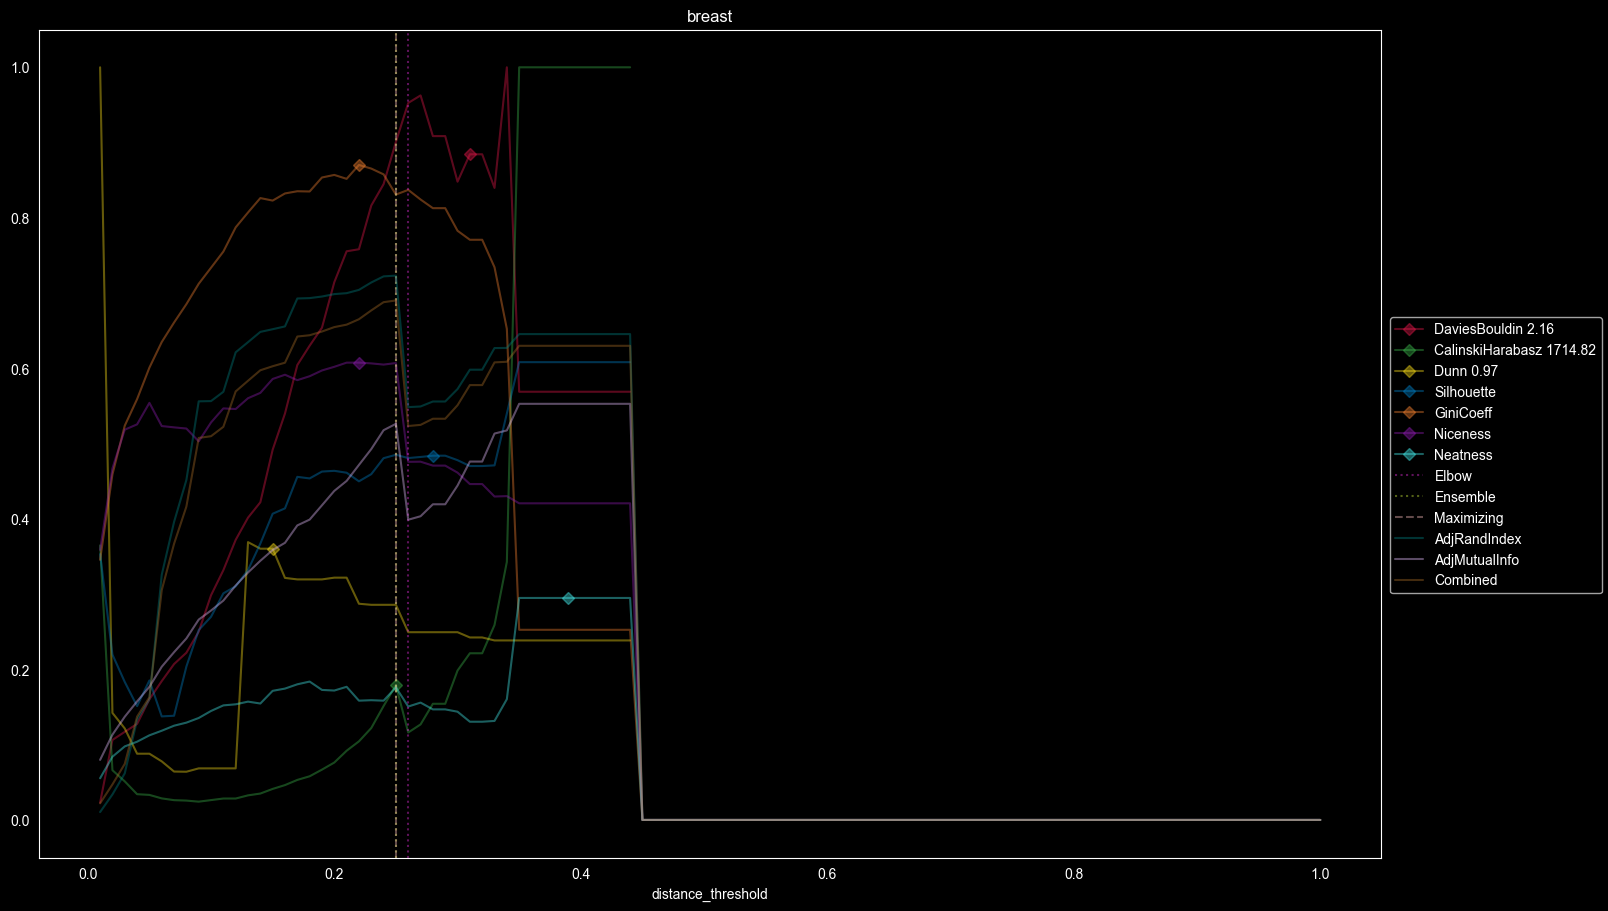

{'Silhouette': 0.4851821285208199, 'Niceness': 0.6070800277657524, 'GiniCoeff': 0.8308989598811293, 'Neatness': 0.17620032280178546, 'sample': {'distance_threshold': 0.25, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 1, 3: 1, 4: 3, 5: 1, 7: 1, 10: 1, 14: 1, 19: 1, 27: 1, 28: 1, 58: 1, 69: 1, 444: 1}, 'DaviesBouldin': 1.948377011778565, 'CalinskiHarabasz': 306.8604839165639, 'Dunn': 0.27669751594223757, 'AdjRandIndex': 0.7232307033910592, 'AdjMutualInfo': 0.5263127270368693, 'Combined': 0.6902140251565767}
0    458
1    241
Name: count, dtype: int64
Dataset Summary
n   699.000000
d    10.000000
k     2.000000
e     0.644154
g     0.167667
Name: breast, dtype: float64


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/569 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

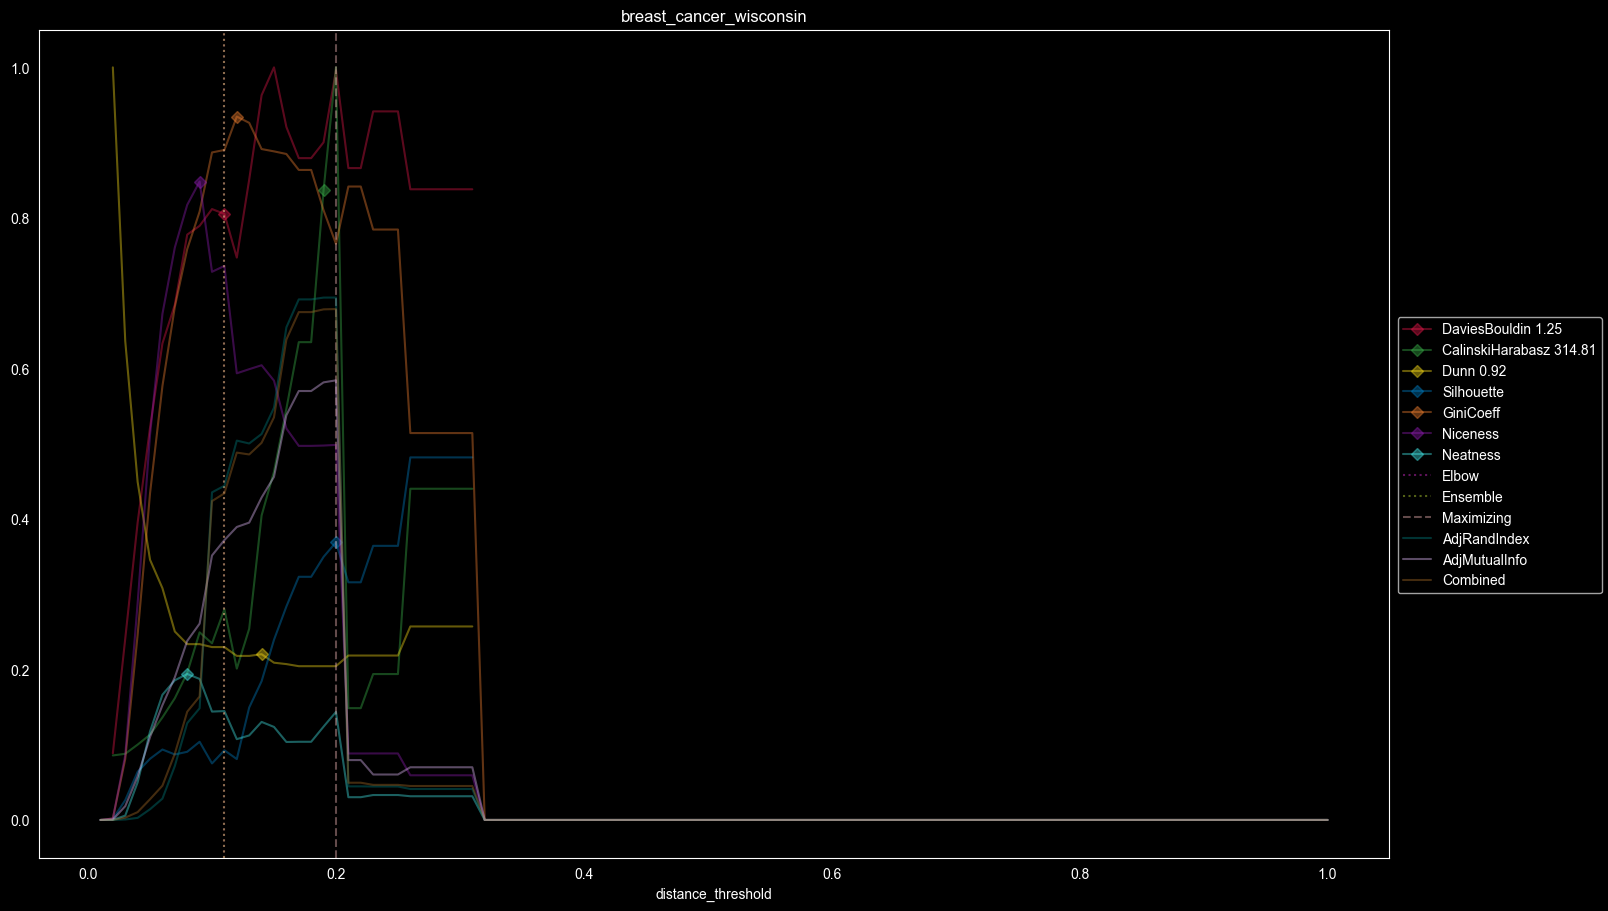

{'Silhouette': 0.3689079924186501, 'Niceness': 0.49835139389421224, 'GiniCoeff': 0.7655364978061427, 'Neatness': 0.14349770323387787, 'sample': {'distance_threshold': 0.2, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 4: 2, 15: 1, 160: 1, 385: 1}, 'DaviesBouldin': 1.2450339208594108, 'CalinskiHarabasz': 314.80553610784114, 'Dunn': 0.18714400725304445, 'AdjRandIndex': 0.6941464166407882, 'AdjMutualInfo': 0.5841595262643937, 'Combined': 0.6788789902941647}
0    357
1    212
Name: count, dtype: int64
Dataset Summary
n   569.000000
d    30.000000
k     2.000000
e     0.660316
g     0.138811
Name: breast_cancer_wisconsin, dtype: float64


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/485 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

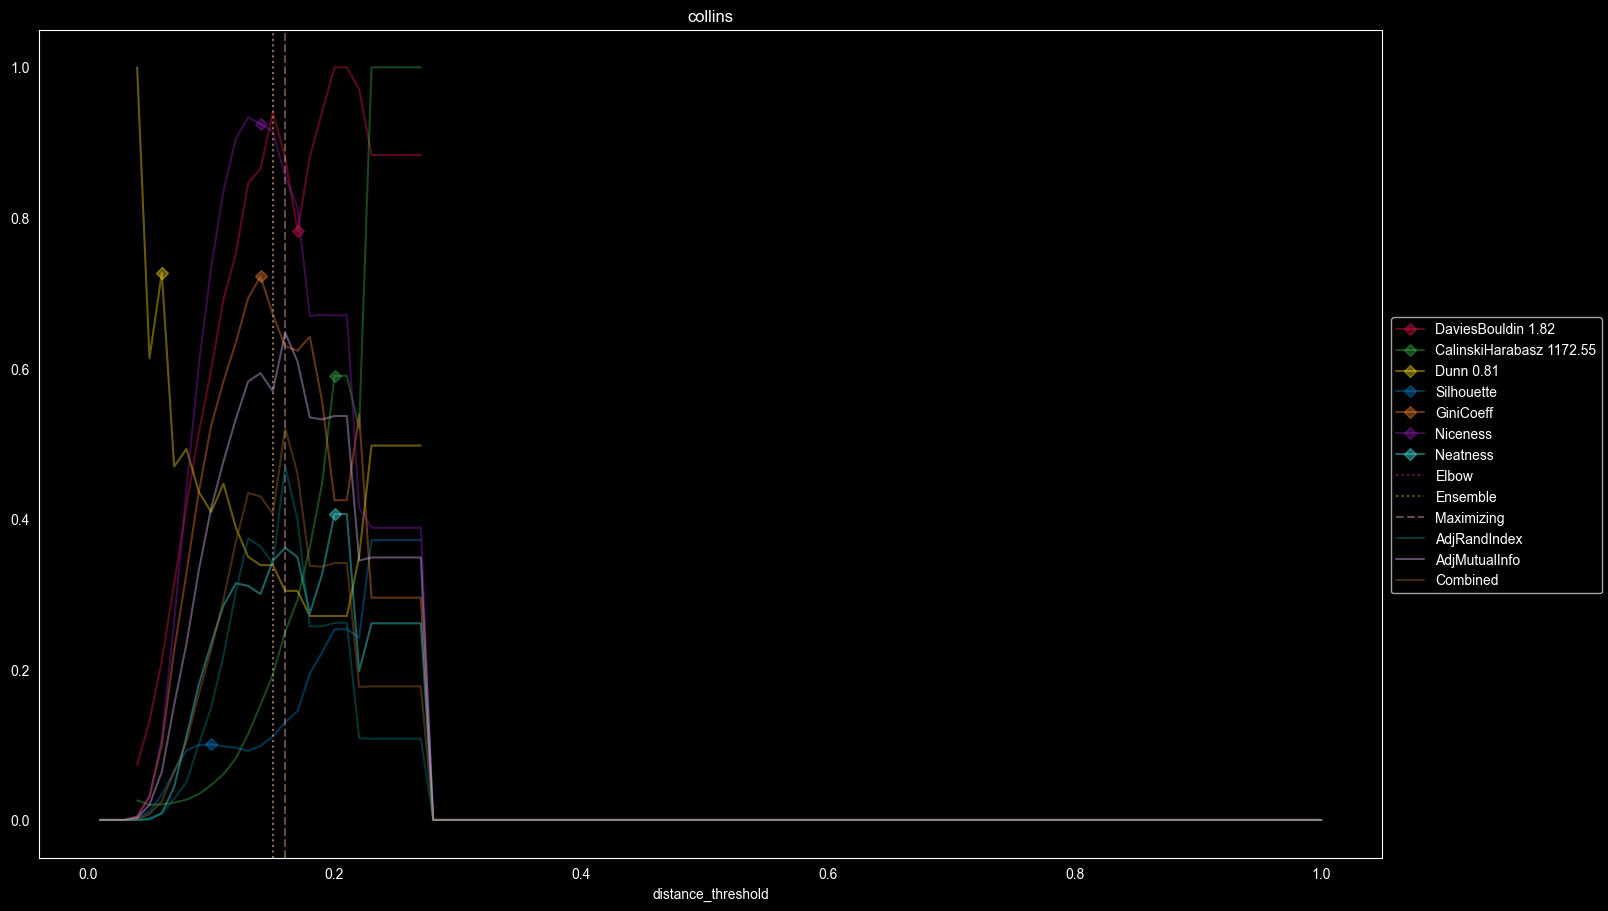

{'Silhouette': 0.1297931609339418, 'Niceness': 0.8551379381712955, 'GiniCoeff': 0.6294353594569577, 'Neatness': 0.3615494418716325, 'sample': {'distance_threshold': 0.16, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 2: 3, 5: 1, 45: 1, 104: 1, 105: 1, 107: 1, 111: 1}, 'DaviesBouldin': 1.6003553698470796, 'CalinskiHarabasz': 292.71326362717093, 'Dunn': 0.24507797237279713, 'AdjRandIndex': 0.46959911743271227, 'AdjMutualInfo': 0.6472800005507138, 'Combined': 0.5209358040478707}
8     80
6     75
5     48
0     44
4     36
7     30
9     29
12    29
13    29
1     27
10    24
2     17
3     17
Name: count, dtype: int64
Dataset Summary
n   485.000000
d    23.000000
k    13.000000
e     2.447482
g     0.288926
Name: collins, dtype: float64


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

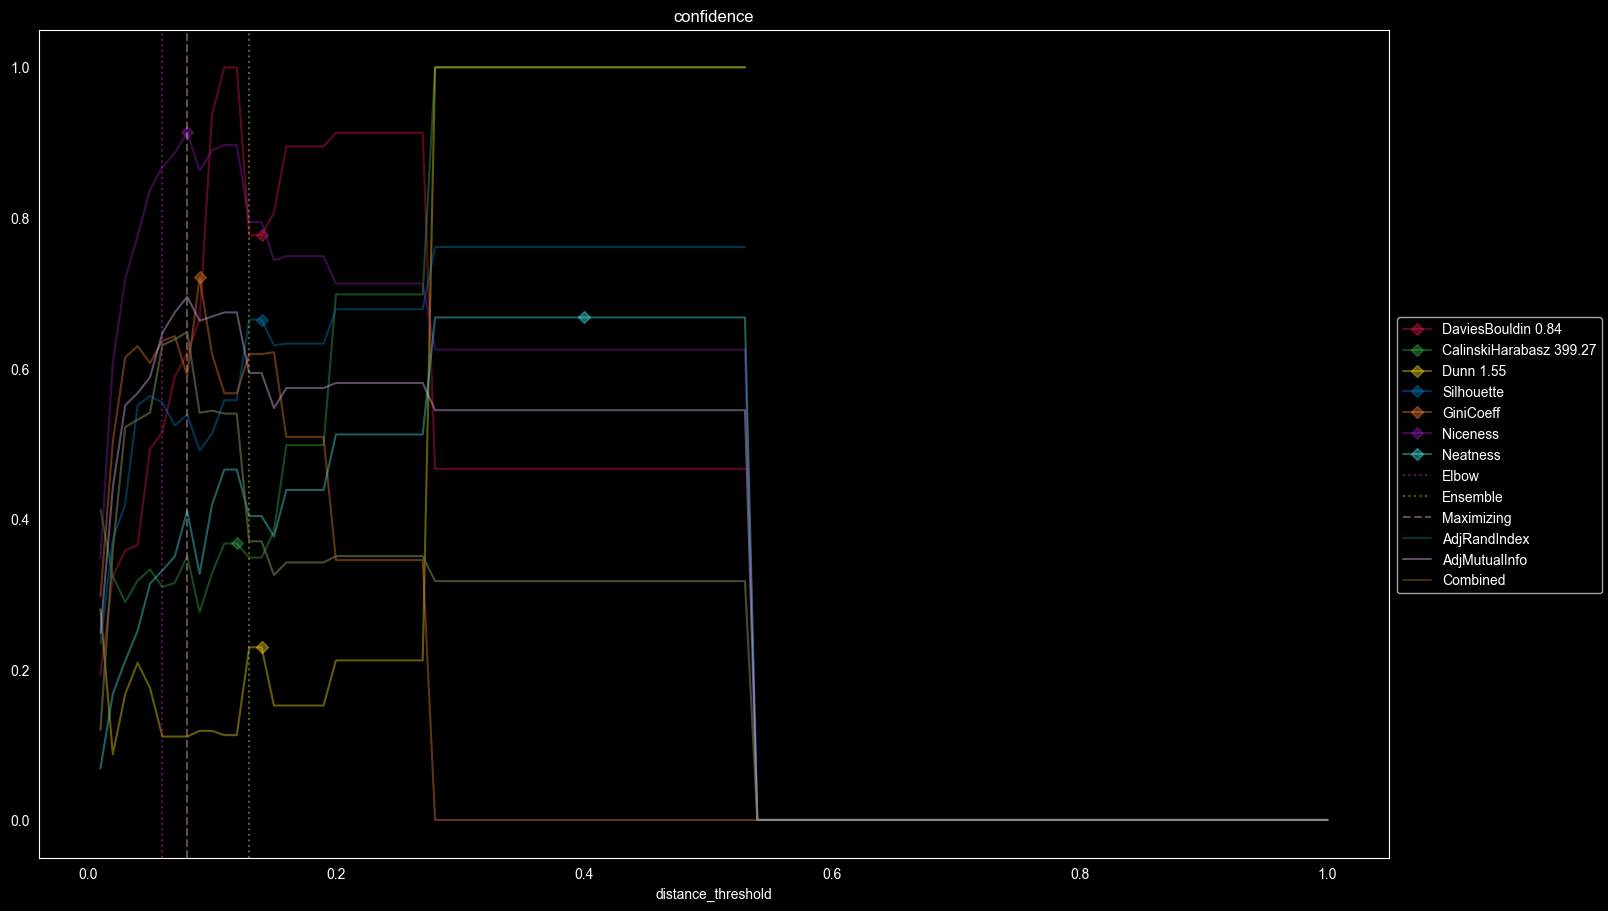

{'Silhouette': 0.5386730561899363, 'Niceness': 0.9137455908289241, 'GiniCoeff': 0.5906593406593407, 'Neatness': 0.4107435035971563, 'sample': {'distance_threshold': 0.08, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 4, 2: 1, 3: 1, 4: 2, 6: 1, 11: 1, 12: 1, 13: 2}, 'DaviesBouldin': 0.5205787181220363, 'CalinskiHarabasz': 139.88495411558281, 'Dunn': 0.17223285578337502, 'AdjRandIndex': 0.6483521570079614, 'AdjMutualInfo': 0.6951089231986718, 'Combined': 0.6483521570079614}
0    12
4    12
2    12
1    12
5    12
3    12
Name: count, dtype: int64
Dataset Summary
n   72.000000
d    3.000000
k    6.000000
e    1.791759
g    0.000000
Name: confidence, dtype: float64


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/366 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

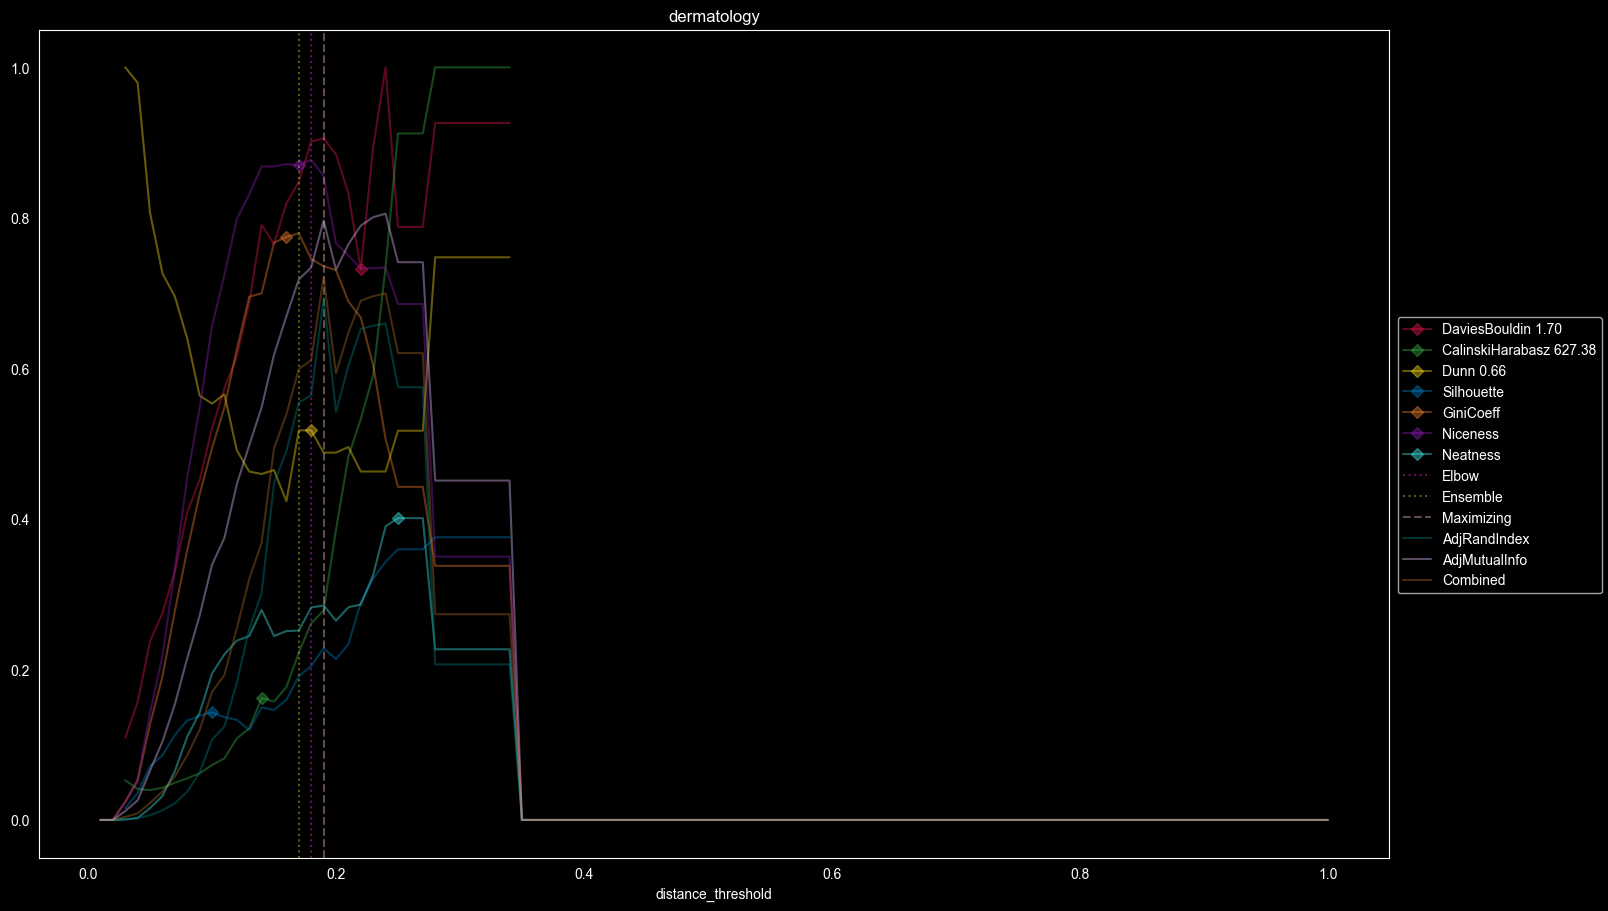

{'Silhouette': 0.22819660440245307, 'Niceness': 0.8556956315243281, 'GiniCoeff': 0.735745543814708, 'Neatness': 0.28510730979280263, 'sample': {'distance_threshold': 0.19, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 2: 2, 3: 1, 4: 1, 6: 1, 7: 1, 9: 2, 10: 1, 51: 1, 70: 1, 80: 1, 111: 1}, 'DaviesBouldin': 1.5366227802077495, 'CalinskiHarabasz': 174.61750623810357, 'Dunn': 0.32157865740385877, 'AdjRandIndex': 0.6931234679028697, 'AdjMutualInfo': 0.7965376419461051, 'Combined': 0.7213308456131363}
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64
Dataset Summary
n   366.000000
d    34.000000
k     6.000000
e     1.686148
g     0.272761
Name: dermatology, dtype: float64


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/327 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

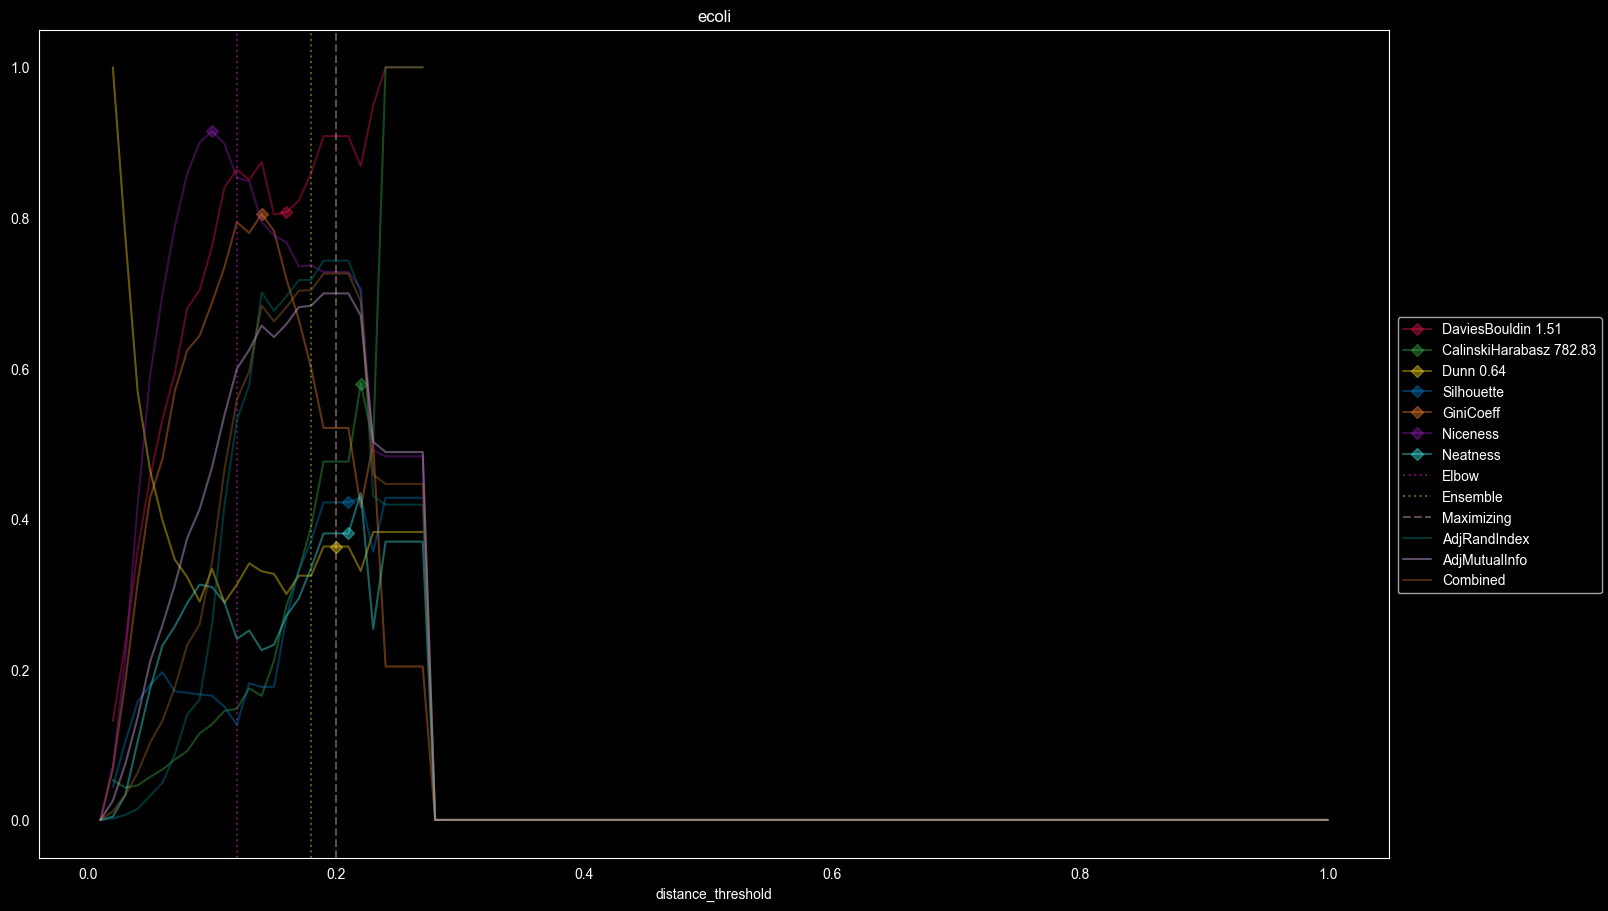

{'Silhouette': 0.4219515007893117, 'Niceness': 0.7279824810860065, 'GiniCoeff': 0.520845231296402, 'Neatness': 0.3806425326804621, 'sample': {'distance_threshold': 0.2, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {2: 1, 8: 1, 69: 1, 104: 1, 144: 1}, 'DaviesBouldin': 1.3719569329244137, 'CalinskiHarabasz': 372.7750429342168, 'Dunn': 0.23169941003424477, 'AdjRandIndex': 0.7431364403991227, 'AdjMutualInfo': 0.6996032526550023, 'Combined': 0.7259518947859097}
0    143
1     77
7     52
4     35
5     20
Name: count, dtype: int64
Dataset Summary
n   327.000000
d     7.000000
k     5.000000
e     1.404712
g     0.394746
Name: ecoli, dtype: float64


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

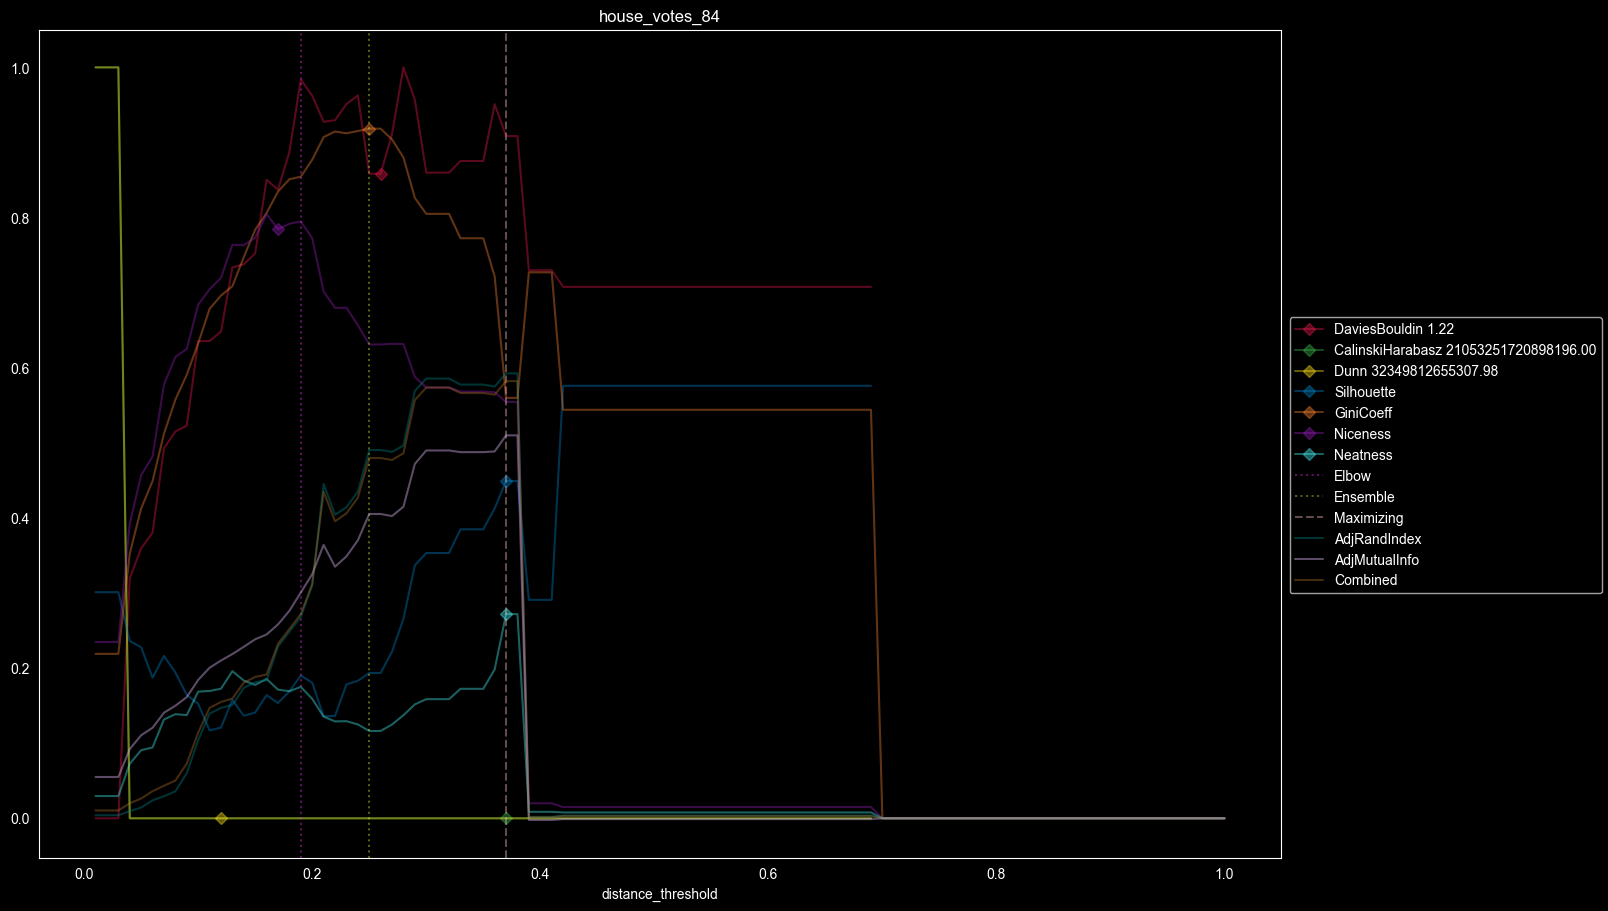

{'Silhouette': 0.4492397508735595, 'Niceness': 0.5544131685336512, 'GiniCoeff': 0.5598731884057971, 'Neatness': 0.2719375603682374, 'sample': {'distance_threshold': 0.37, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 3: 1, 202: 1, 229: 1}, 'DaviesBouldin': 1.106925731808095, 'CalinskiHarabasz': 442.2585019314507, 'Dunn': 0.27163849778099913, 'AdjRandIndex': 0.5924979174356702, 'AdjMutualInfo': 0.5099929442682476, 'Combined': 0.5821399561304121}
0    267
1    168
Name: count, dtype: int64
Dataset Summary
n   435.000000
d    16.000000
k     2.000000
e     0.667021
g     0.125543
Name: house_votes_84, dtype: float64


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

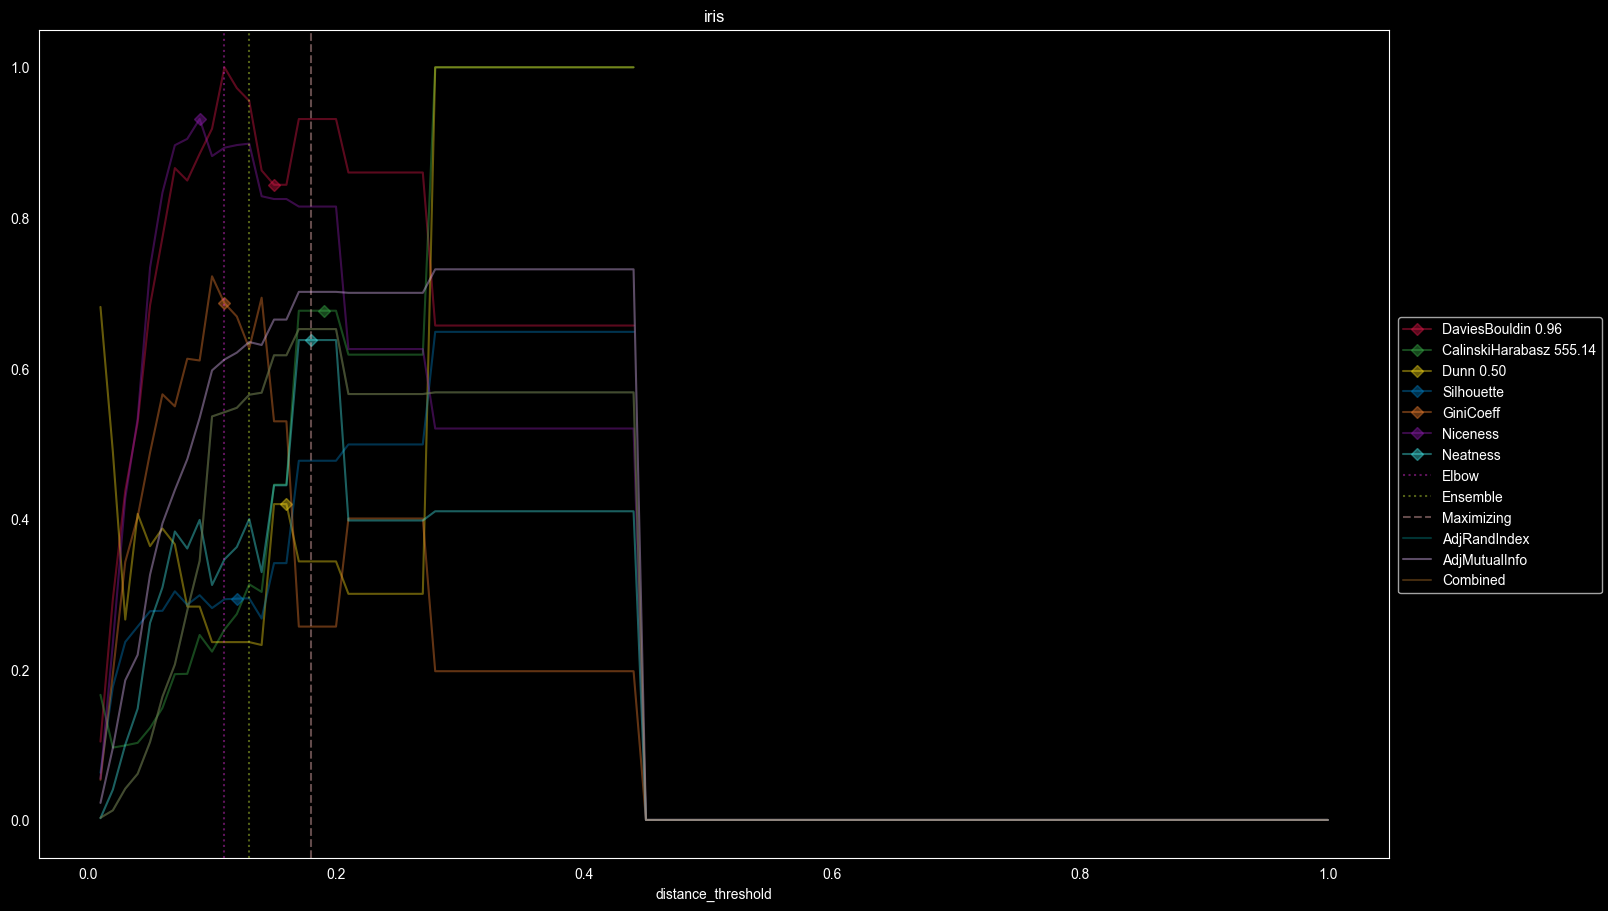

{'Silhouette': 0.47726025597204835, 'Niceness': 0.8149998805271983, 'GiniCoeff': 0.25691699604743085, 'Neatness': 0.6376183780066198, 'sample': {'distance_threshold': 0.18, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {12: 1, 37: 1, 50: 1, 51: 1}, 'DaviesBouldin': 0.897259395549169, 'CalinskiHarabasz': 375.60259226087175, 'Dunn': 0.17073763102706013, 'AdjRandIndex': 0.6521833727068936, 'AdjMutualInfo': 0.7016361903834069, 'Combined': 0.6521833727068936}
2    50
1    50
0    50
Name: count, dtype: int64
Dataset Summary
n   150.000000
d     4.000000
k     3.000000
e     1.098612
g     0.000000
Name: iris, dtype: float64


  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

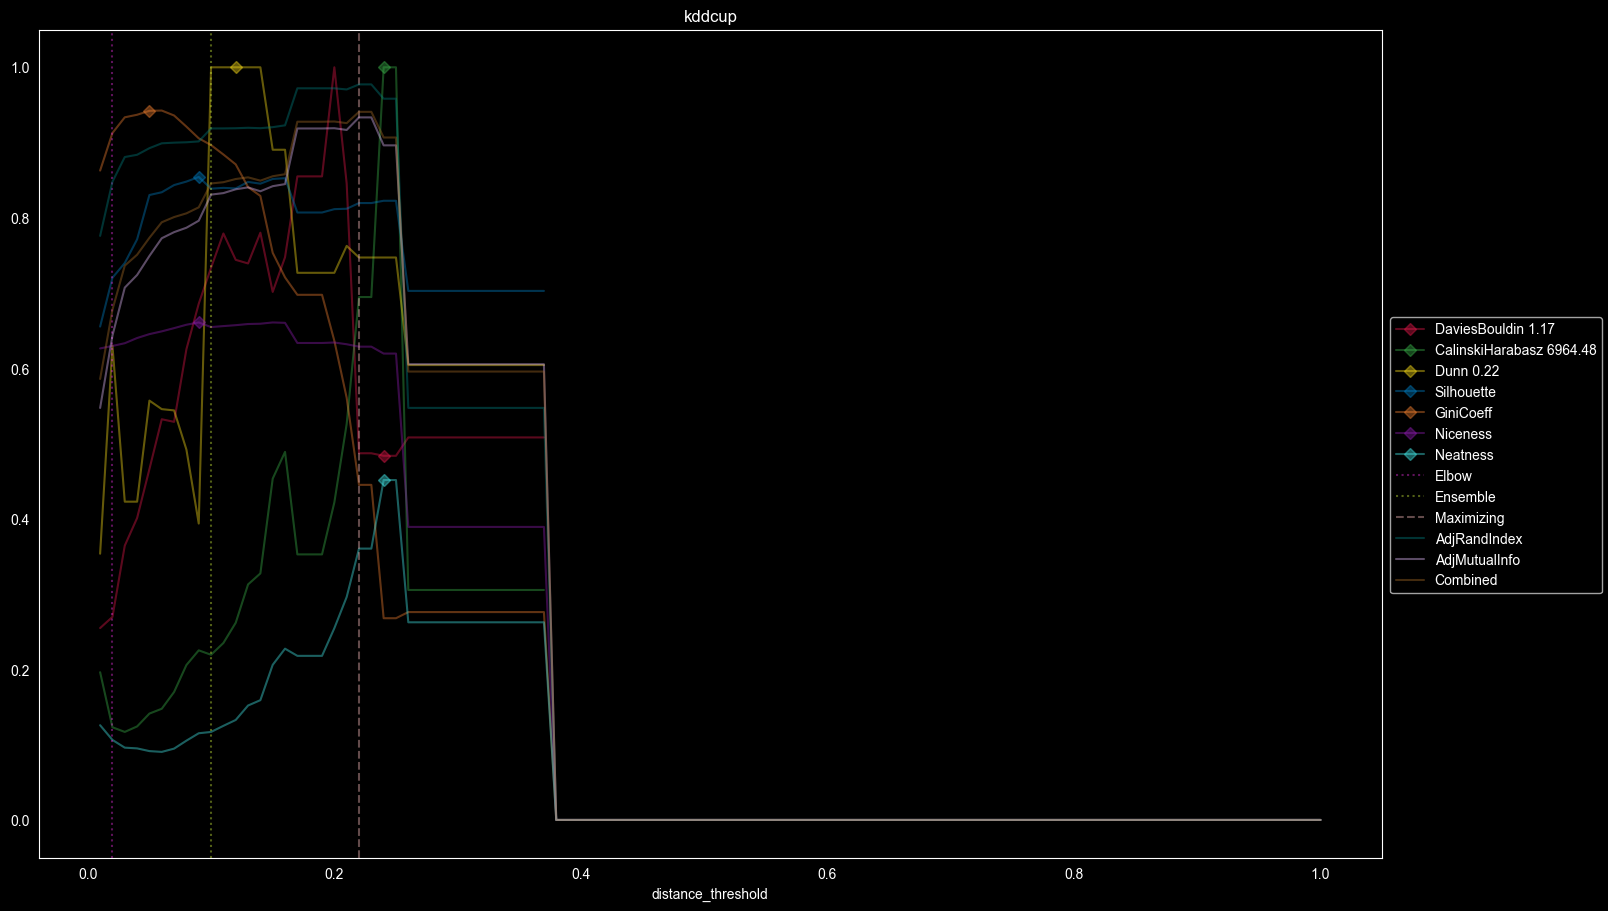

{'Silhouette': 0.8196270461561581, 'Niceness': 0.628834376187744, 'GiniCoeff': 0.4452146094374833, 'Neatness': 0.3605332368093885, 'sample': {'distance_threshold': 0.22, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {21: 1, 191: 1, 220: 1, 568: 1}, 'DaviesBouldin': 0.5687158280053832, 'CalinskiHarabasz': 4838.610418987072, 'Dunn': 0.16736774216822095, 'AdjRandIndex': 0.9772833727498358, 'AdjMutualInfo': 0.9334349029298562, 'Combined': 0.9408196734584192}
18    568
9     217
11    197
0       4
5       3
17      3
20      2
21      2
15      2
14      1
10      1
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     41.000000
k     11.000000
e      1.080906
g      0.831584
Name: kddcup, dtype: float64


  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

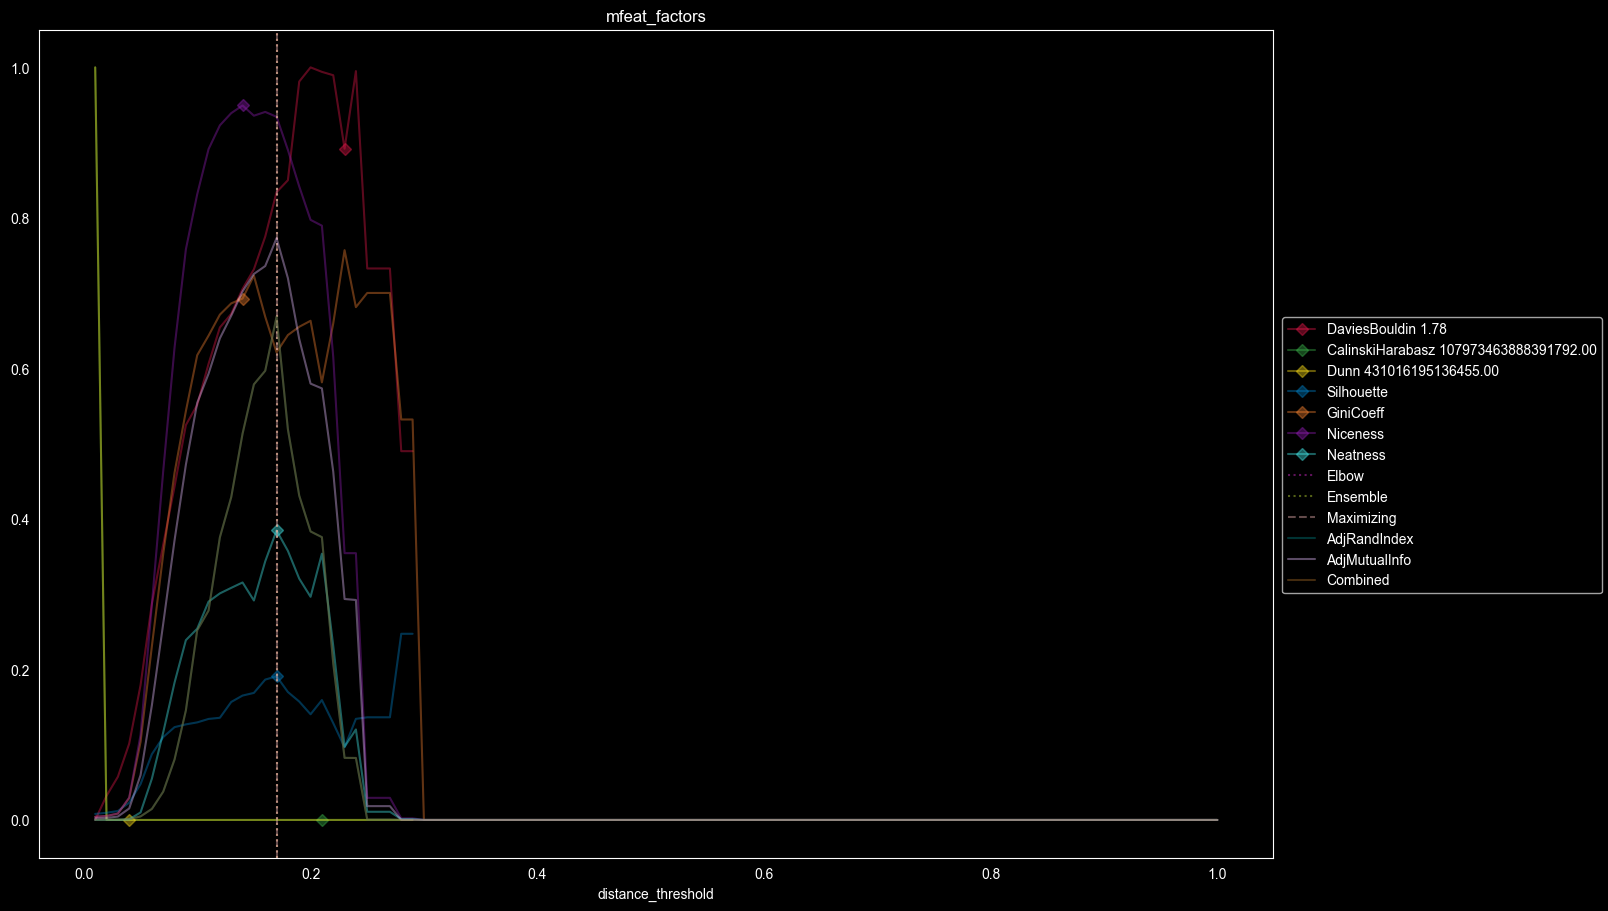

{'Silhouette': 0.1909285734133719, 'Niceness': 0.9343449050122189, 'GiniCoeff': 0.6213131043842854, 'Neatness': 0.3846278793519893, 'sample': {'distance_threshold': 0.17, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 4, 3: 2, 4: 1, 10: 1, 11: 1, 12: 1, 14: 1, 15: 1, 43: 1, 57: 1, 64: 1, 76: 1, 81: 1, 94: 1, 96: 1, 99: 1, 109: 1, 205: 1}, 'DaviesBouldin': 1.4867479285338696, 'CalinskiHarabasz': 420.50231534615165, 'Dunn': 0.20326365105781377, 'AdjRandIndex': 0.6685656247852217, 'AdjMutualInfo': 0.7730244129729194, 'Combined': 0.6685656247852217}
9    100
6    100
4    100
2    100
5    100
7    100
3    100
1    100
0    100
8    100
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d    216.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_factors, dtype: float64


  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

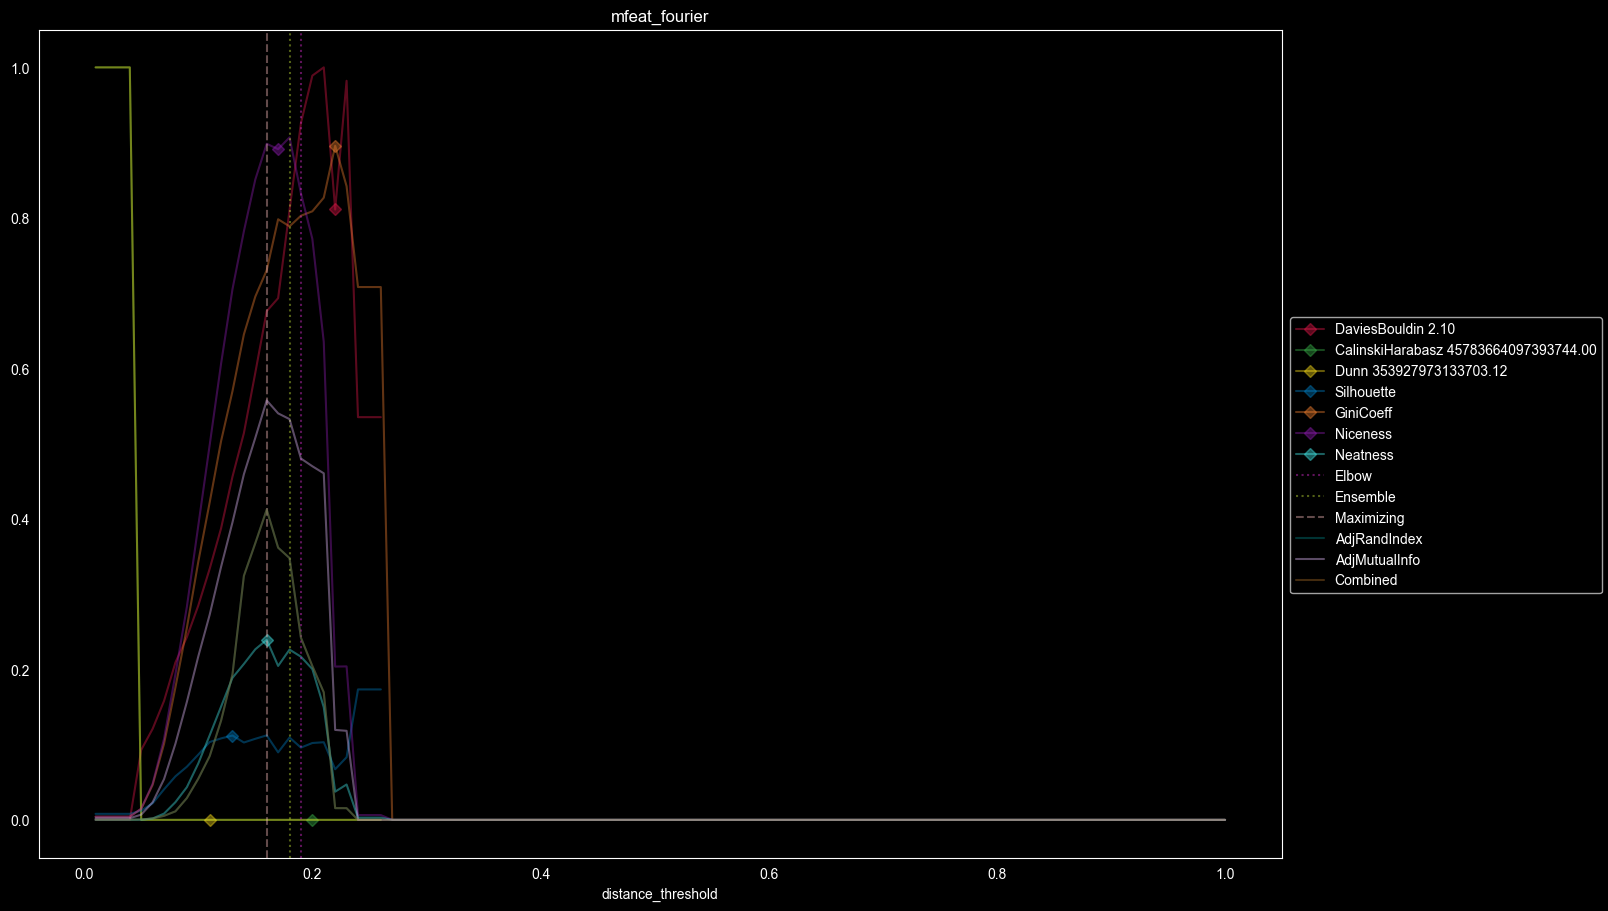

{'Silhouette': 0.11230472286522278, 'Niceness': 0.8984567083301114, 'GiniCoeff': 0.7304185550519862, 'Neatness': 0.2392645846608835, 'sample': {'distance_threshold': 0.16, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 36, 2: 21, 3: 13, 4: 10, 5: 6, 6: 3, 7: 4, 8: 2, 9: 4, 10: 1, 11: 3, 13: 1, 14: 1, 16: 1, 17: 2, 21: 1, 26: 2, 27: 1, 28: 1, 34: 1, 35: 1, 45: 1, 65: 1, 91: 1, 98: 1, 99: 1}, 'DaviesBouldin': 1.4164660642177664, 'CalinskiHarabasz': 133.3612118273029, 'Dunn': 0.3223715153931762, 'AdjRandIndex': 0.4122044348623299, 'AdjMutualInfo': 0.557414731125357, 'Combined': 0.4122044348623299}
9    100
6    100
4    100
2    100
5    100
7    100
3    100
1    100
0    100
8    100
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     76.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_fourier, dtype: float64


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

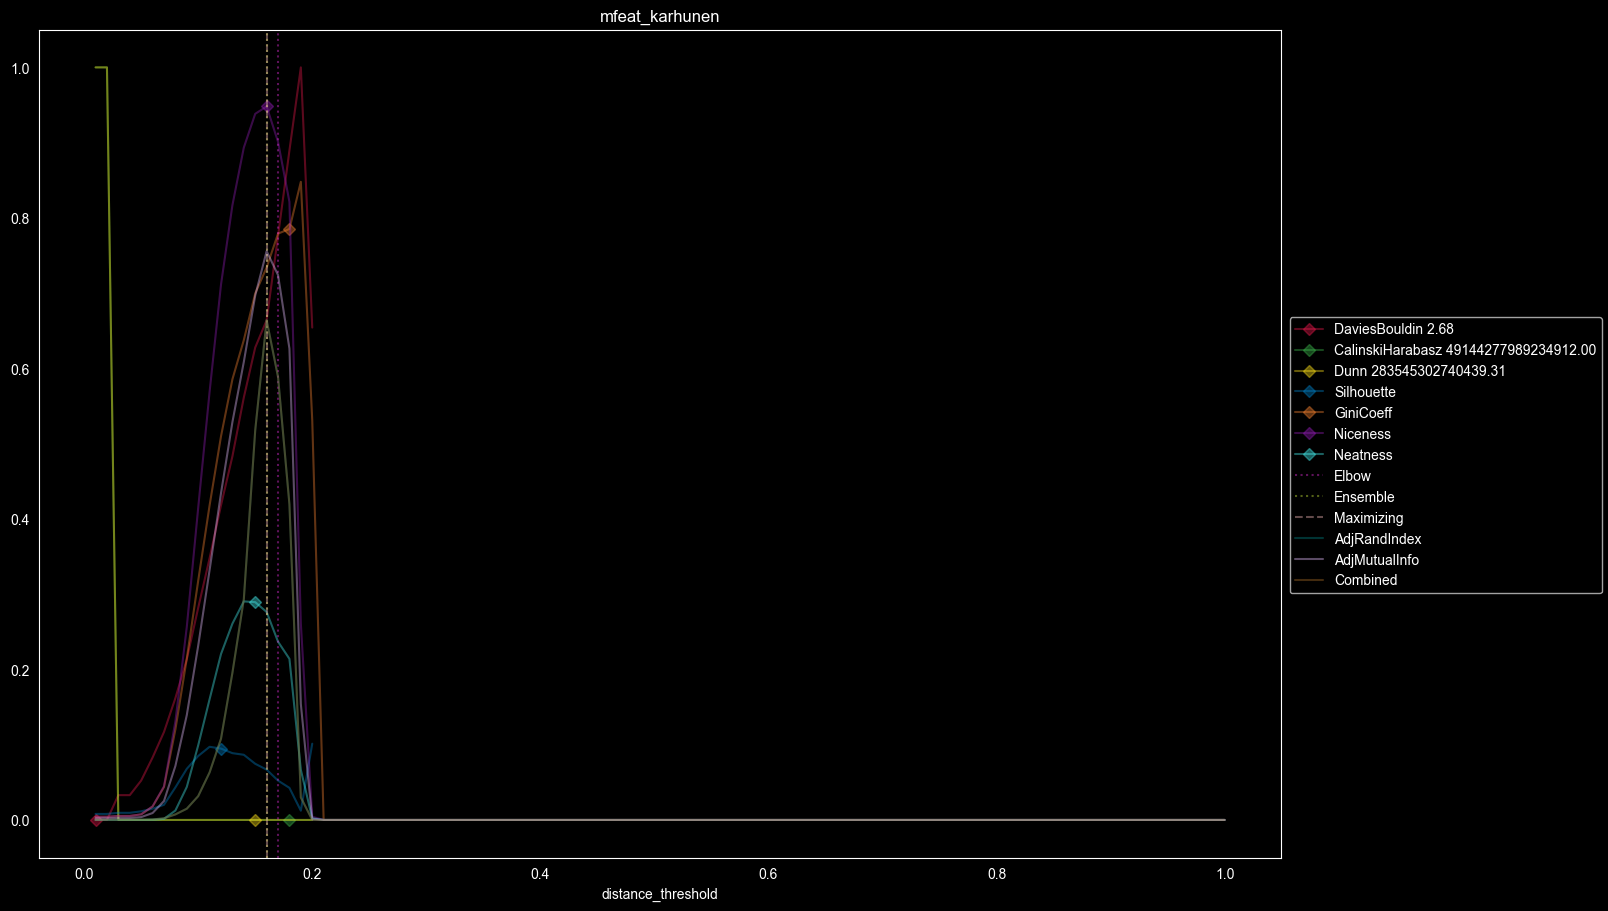

{'Silhouette': 0.06686943155973472, 'Niceness': 0.9481096844799226, 'GiniCoeff': 0.7340200189040498, 'Neatness': 0.2763598578714648, 'sample': {'distance_threshold': 0.16, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 14, 2: 8, 3: 2, 4: 7, 6: 3, 9: 1, 10: 1, 12: 1, 13: 1, 14: 1, 16: 2, 18: 1, 20: 1, 33: 1, 43: 1, 45: 1, 49: 1, 54: 1, 64: 1, 65: 1, 81: 1, 82: 1, 88: 1, 89: 1, 97: 1}, 'DaviesBouldin': 1.7807608561335357, 'CalinskiHarabasz': 240.53085074382537, 'Dunn': 0.41648758145249365, 'AdjRandIndex': 0.6640914059208975, 'AdjMutualInfo': 0.7557528439692964, 'Combined': 0.6640914059208975}
9    100
6    100
4    100
2    100
5    100
7    100
3    100
1    100
0    100
8    100
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     64.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_karhunen, dtype: float64


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

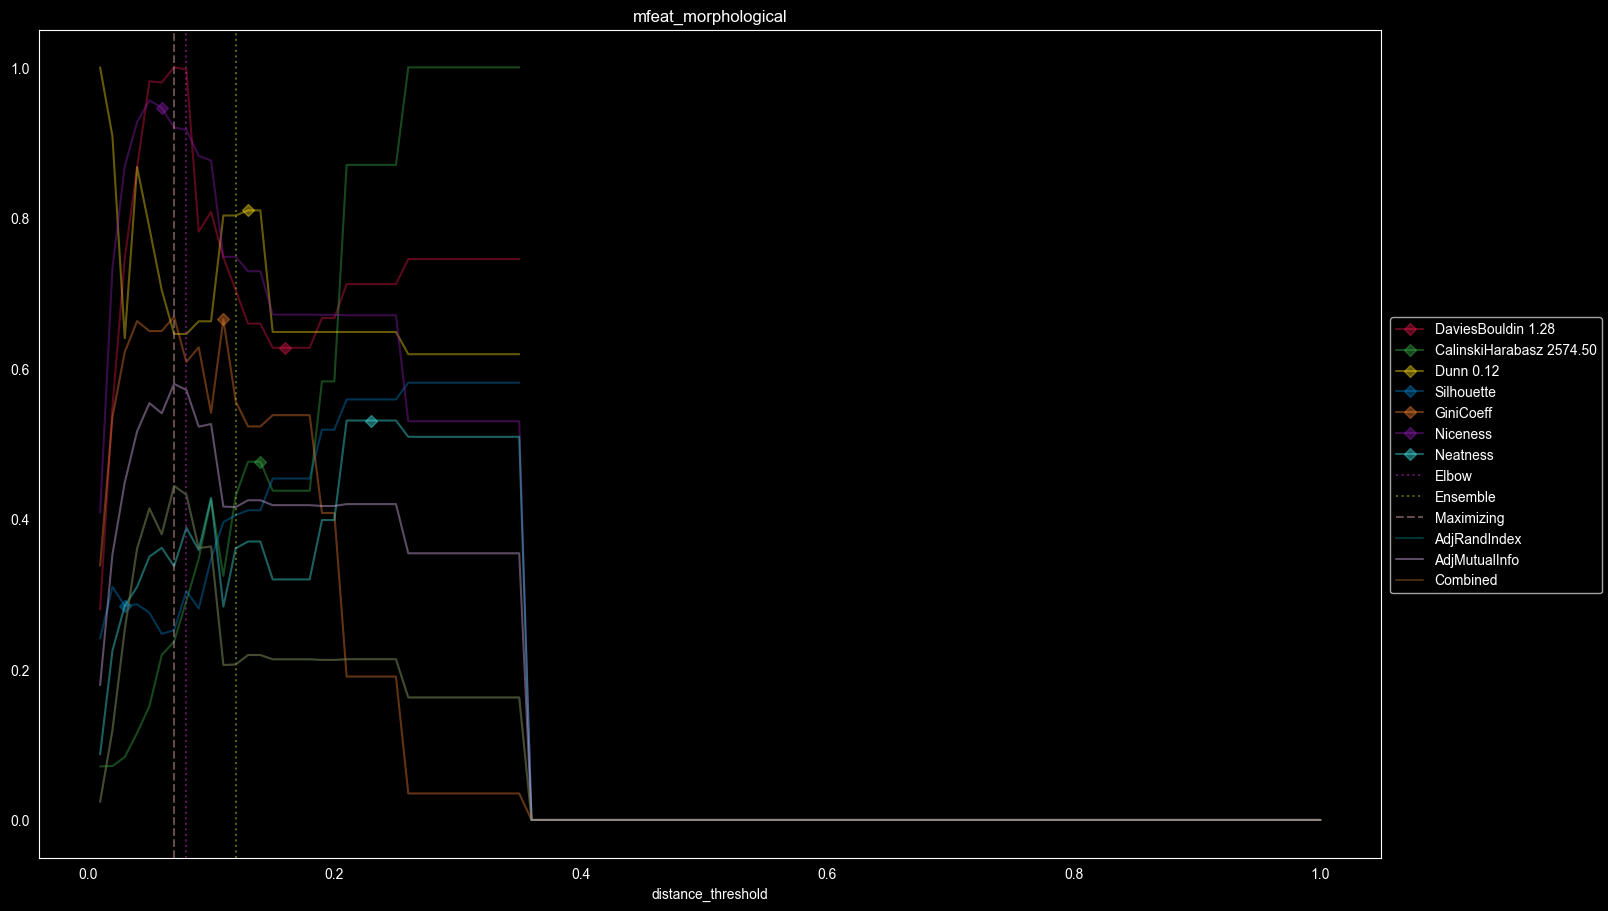

{'Silhouette': 0.2522029833407276, 'Niceness': 0.9200516807892957, 'GiniCoeff': 0.668469360551472, 'Neatness': 0.3372136252268951, 'sample': {'distance_threshold': 0.07, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 3, 2: 3, 3: 1, 5: 1, 11: 1, 12: 1, 16: 1, 19: 1, 37: 1, 40: 1, 71: 1, 88: 1, 99: 1, 100: 1, 127: 1, 171: 1, 192: 1}, 'DaviesBouldin': 1.2760904320113498, 'CalinskiHarabasz': 610.2545220873801, 'Dunn': 0.07685529351756466, 'AdjRandIndex': 0.44389548534245654, 'AdjMutualInfo': 0.5794302607580354, 'Combined': 0.44389548534245654}
9    100
6    100
4    100
2    100
5    100
7    100
3    100
1    100
0    100
8    100
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d      6.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_morphological, dtype: float64


  0%|          | 0/240 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

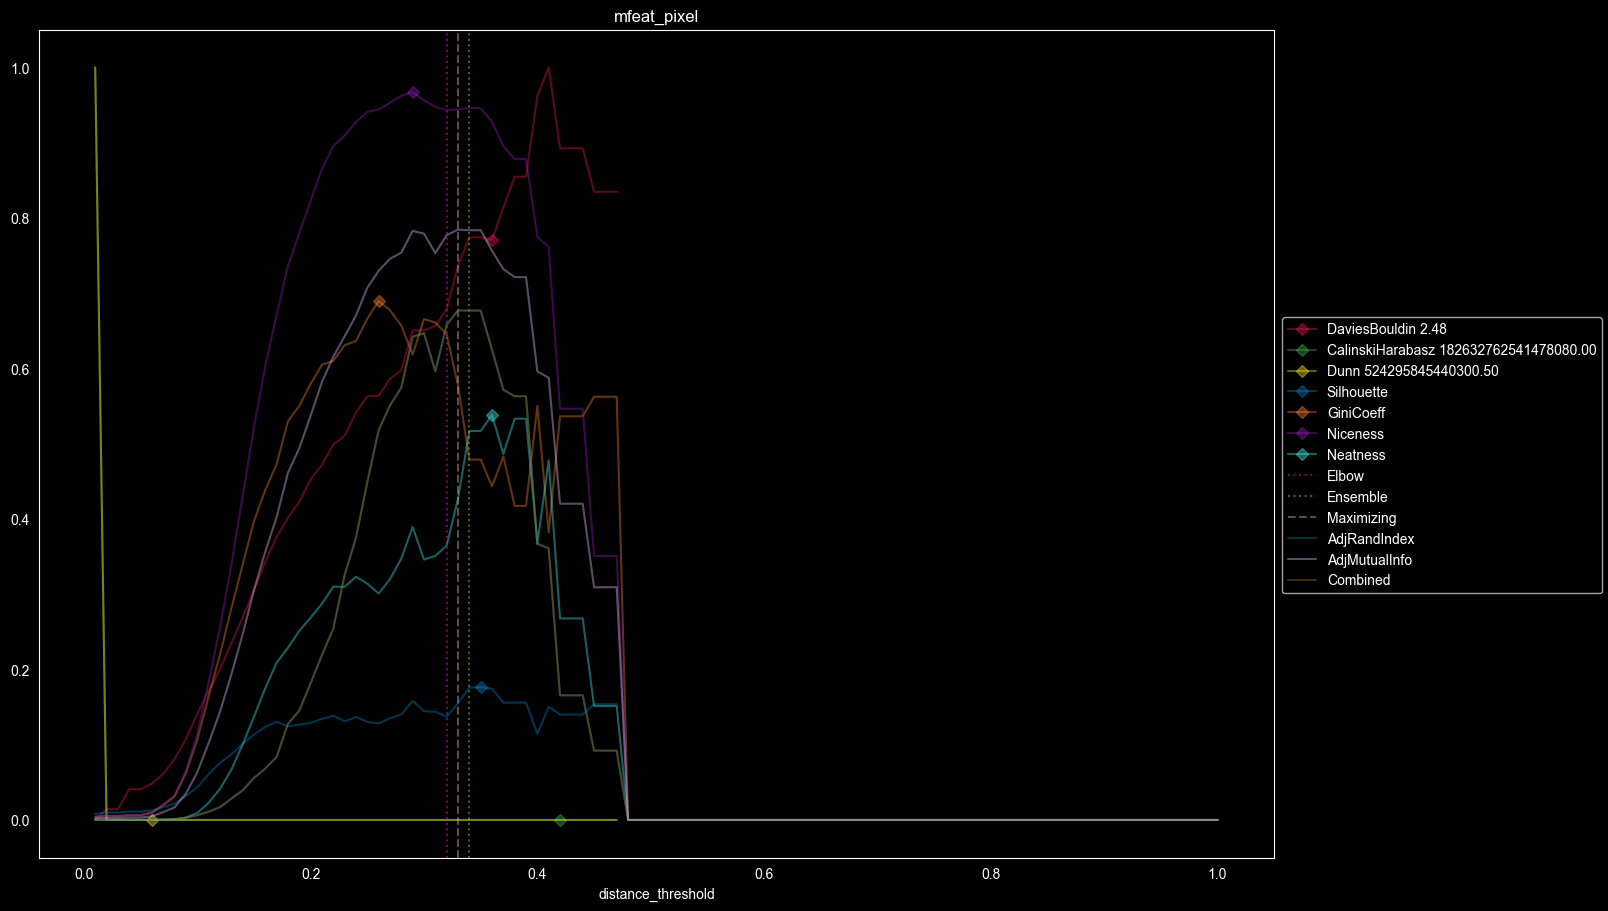

{'Silhouette': 0.1551547041886449, 'Niceness': 0.9442076309868523, 'GiniCoeff': 0.577268284013152, 'Neatness': 0.4266004654634623, 'sample': {'distance_threshold': 0.33, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 1, 3: 2, 5: 1, 6: 1, 9: 1, 11: 1, 12: 1, 17: 1, 27: 1, 34: 1, 54: 1, 71: 1, 75: 1, 88: 1, 95: 2, 96: 1, 131: 1, 165: 1}, 'DaviesBouldin': 1.8303485697778419, 'CalinskiHarabasz': 399.1502033268924, 'Dunn': 0.212375515783766, 'AdjRandIndex': 0.6769429969848709, 'AdjMutualInfo': 0.7844764668654289, 'Combined': 0.6769429969848709}
9    100
6    100
4    100
2    100
5    100
7    100
3    100
1    100
0    100
8    100
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d    240.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_pixel, dtype: float64


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

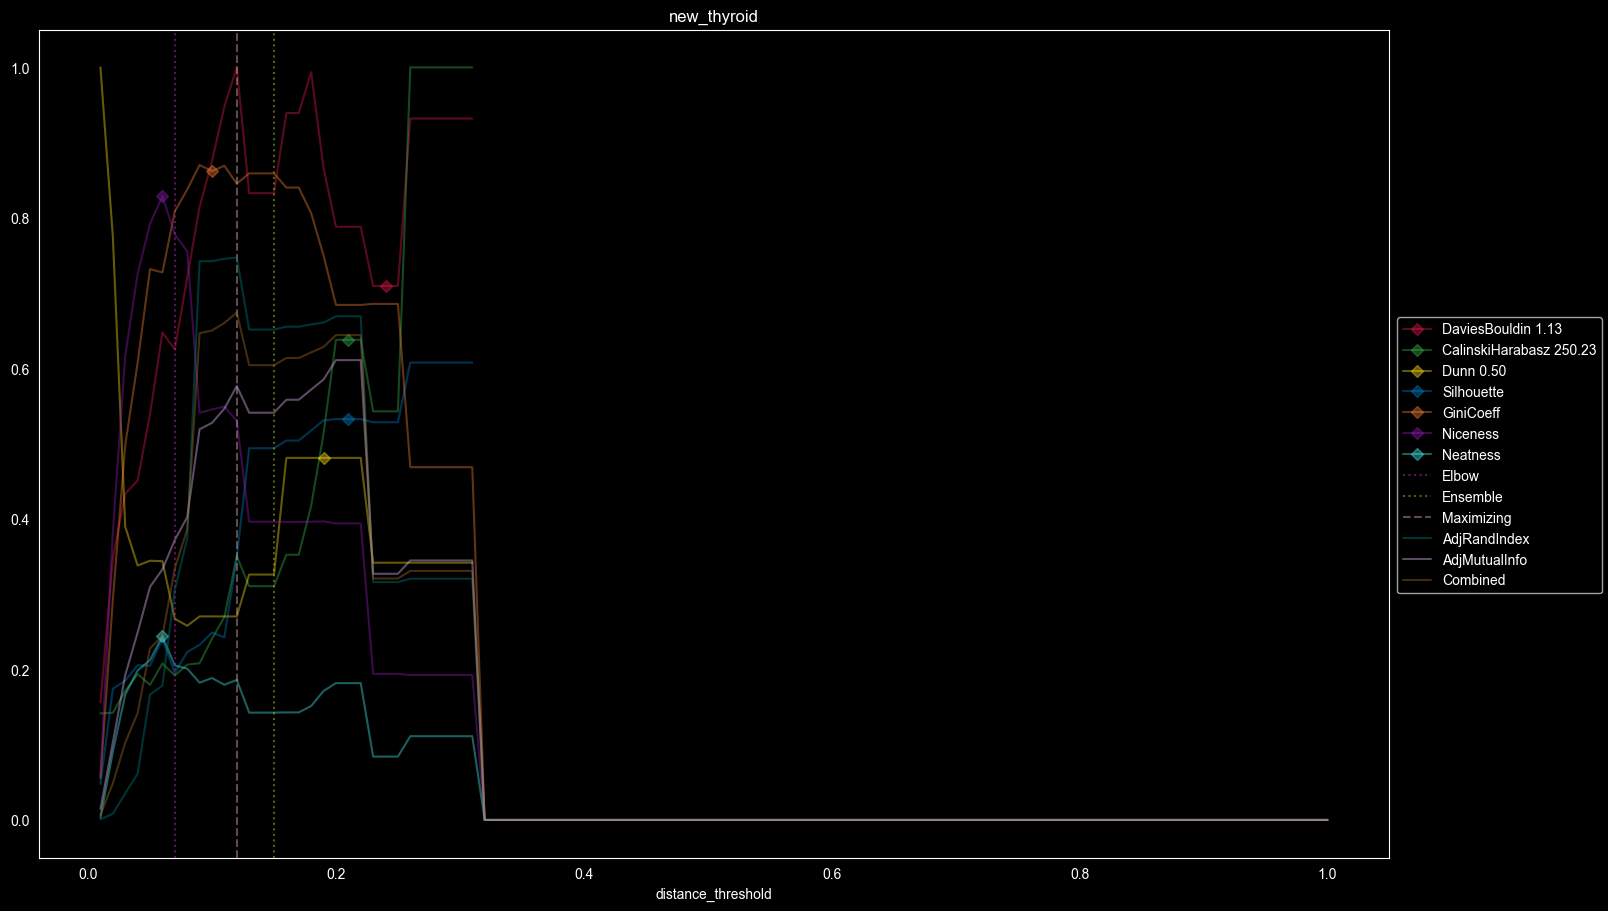

{'Silhouette': 0.3487242085898186, 'Niceness': 0.5305229485396384, 'GiniCoeff': 0.8454545454545455, 'Neatness': 0.18603263678842008, 'sample': {'distance_threshold': 0.12, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 2: 2, 3: 2, 5: 1, 7: 1, 10: 1, 11: 1, 19: 1, 152: 1}, 'DaviesBouldin': 1.1250660532760854, 'CalinskiHarabasz': 87.6958221377228, 'Dunn': 0.1339017936171292, 'AdjRandIndex': 0.7472396095182403, 'AdjMutualInfo': 0.5766370238441718, 'Combined': 0.6741242156579252}
1    150
2     35
3     30
Name: count, dtype: int64
Dataset Summary
n   215.000000
d     5.000000
k     3.000000
e     0.821483
g     0.428571
Name: new_thyroid, dtype: float64


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

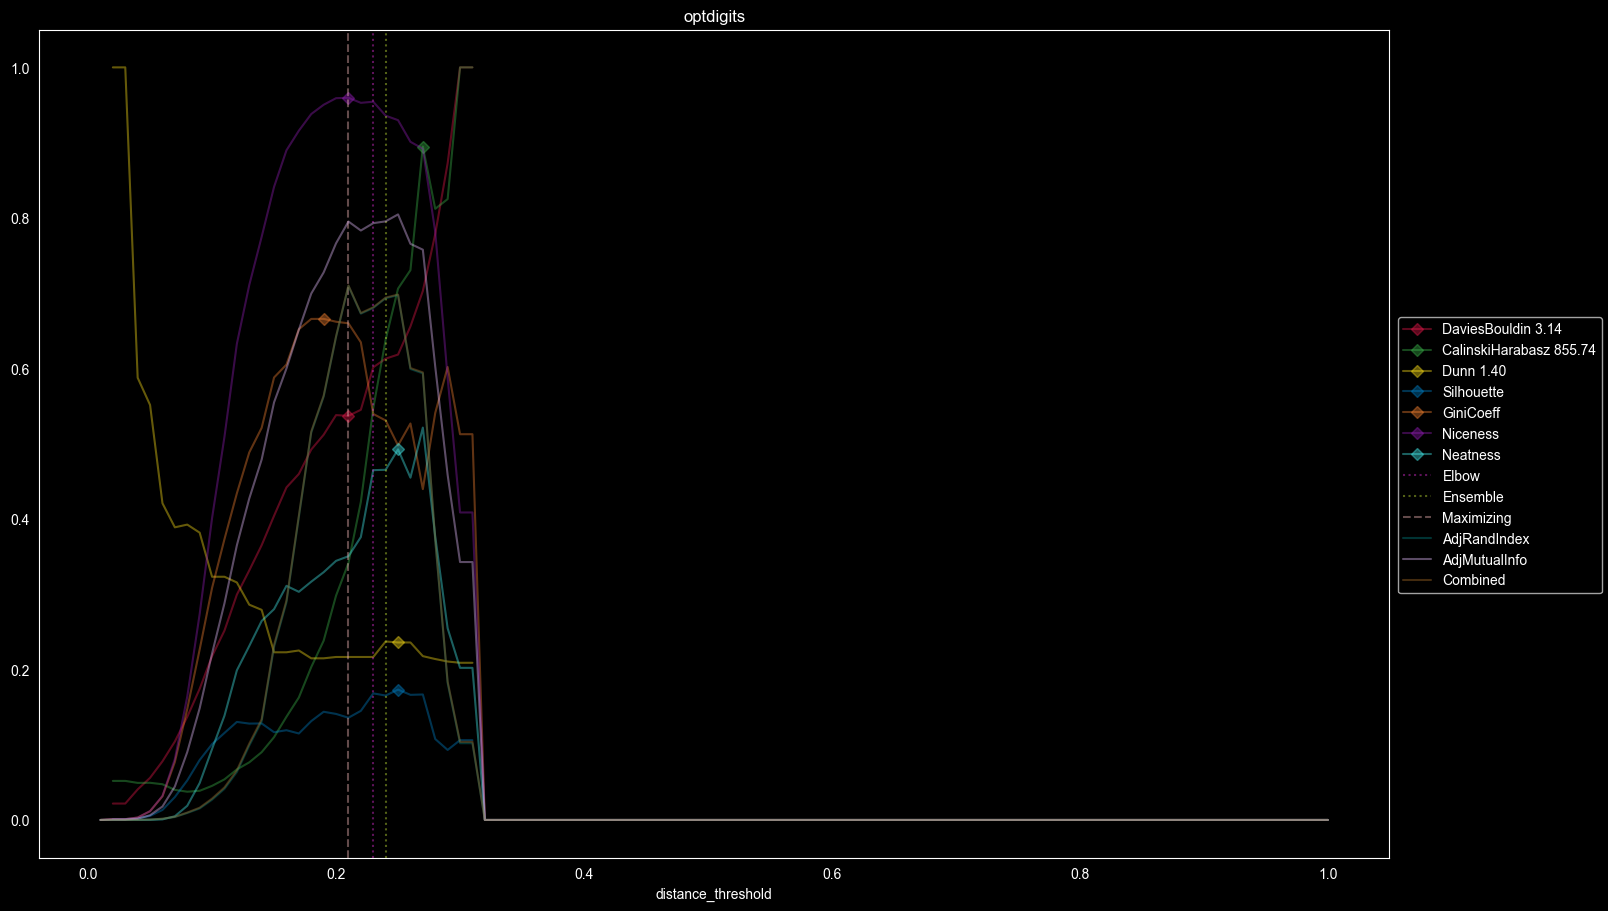

{'Silhouette': 0.13581742464671387, 'Niceness': 0.9596154491565222, 'GiniCoeff': 0.6599085772249351, 'Neatness': 0.3504120473760285, 'sample': {'distance_threshold': 0.21, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 7, 2: 2, 3: 2, 4: 3, 5: 1, 6: 3, 7: 2, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 15: 1, 19: 2, 20: 1, 24: 1, 40: 1, 48: 1, 58: 1, 63: 1, 68: 1, 71: 1, 78: 1, 81: 1, 86: 1, 94: 1, 95: 1}, 'DaviesBouldin': 1.6834866885076276, 'CalinskiHarabasz': 292.1056263713691, 'Dunn': 0.3022712268496753, 'AdjRandIndex': 0.7095530407041443, 'AdjMutualInfo': 0.7951481689361749, 'Combined': 0.7102284914627868}
3    102
1    102
7    101
4    101
9    100
2     99
6     99
8     99
5     99
0     98
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     64.000000
k     10.000000
e      2.302495
g      0.007891
Name: optdigits, dtype: float64


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

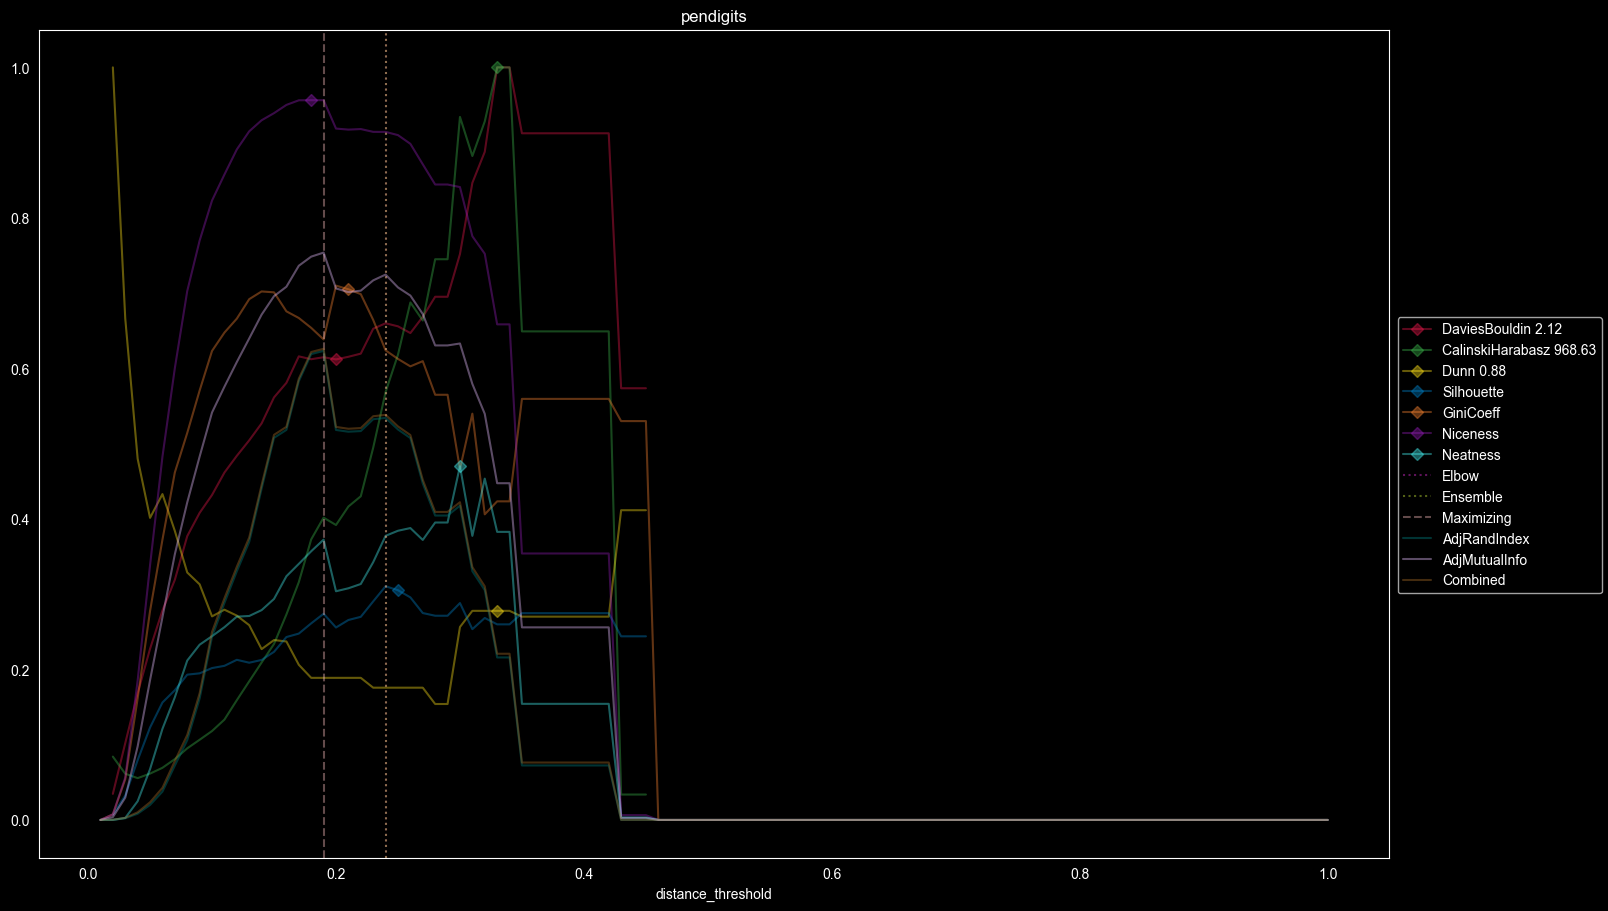

{'Silhouette': 0.27399100743796057, 'Niceness': 0.9563948544295543, 'GiniCoeff': 0.6384493546818888, 'Neatness': 0.3724477179550388, 'sample': {'distance_threshold': 0.19, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 3, 2: 4, 3: 2, 5: 2, 9: 1, 10: 3, 11: 1, 12: 2, 15: 1, 17: 2, 18: 1, 23: 1, 25: 1, 35: 1, 62: 2, 66: 1, 68: 1, 70: 1, 80: 1, 96: 1, 122: 1, 123: 1}, 'DaviesBouldin': 1.3009874327993933, 'CalinskiHarabasz': 389.13032350425186, 'Dunn': 0.16537851787895144, 'AdjRandIndex': 0.6232675696496791, 'AdjMutualInfo': 0.7538909187493343, 'Combined': 0.6260534581935266}
2    104
4    104
1    104
0    104
7    104
3     96
8     96
6     96
5     96
9     96
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     16.000000
k     10.000000
e      2.301785
g      0.021328
Name: pendigits, dtype: float64


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/333 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

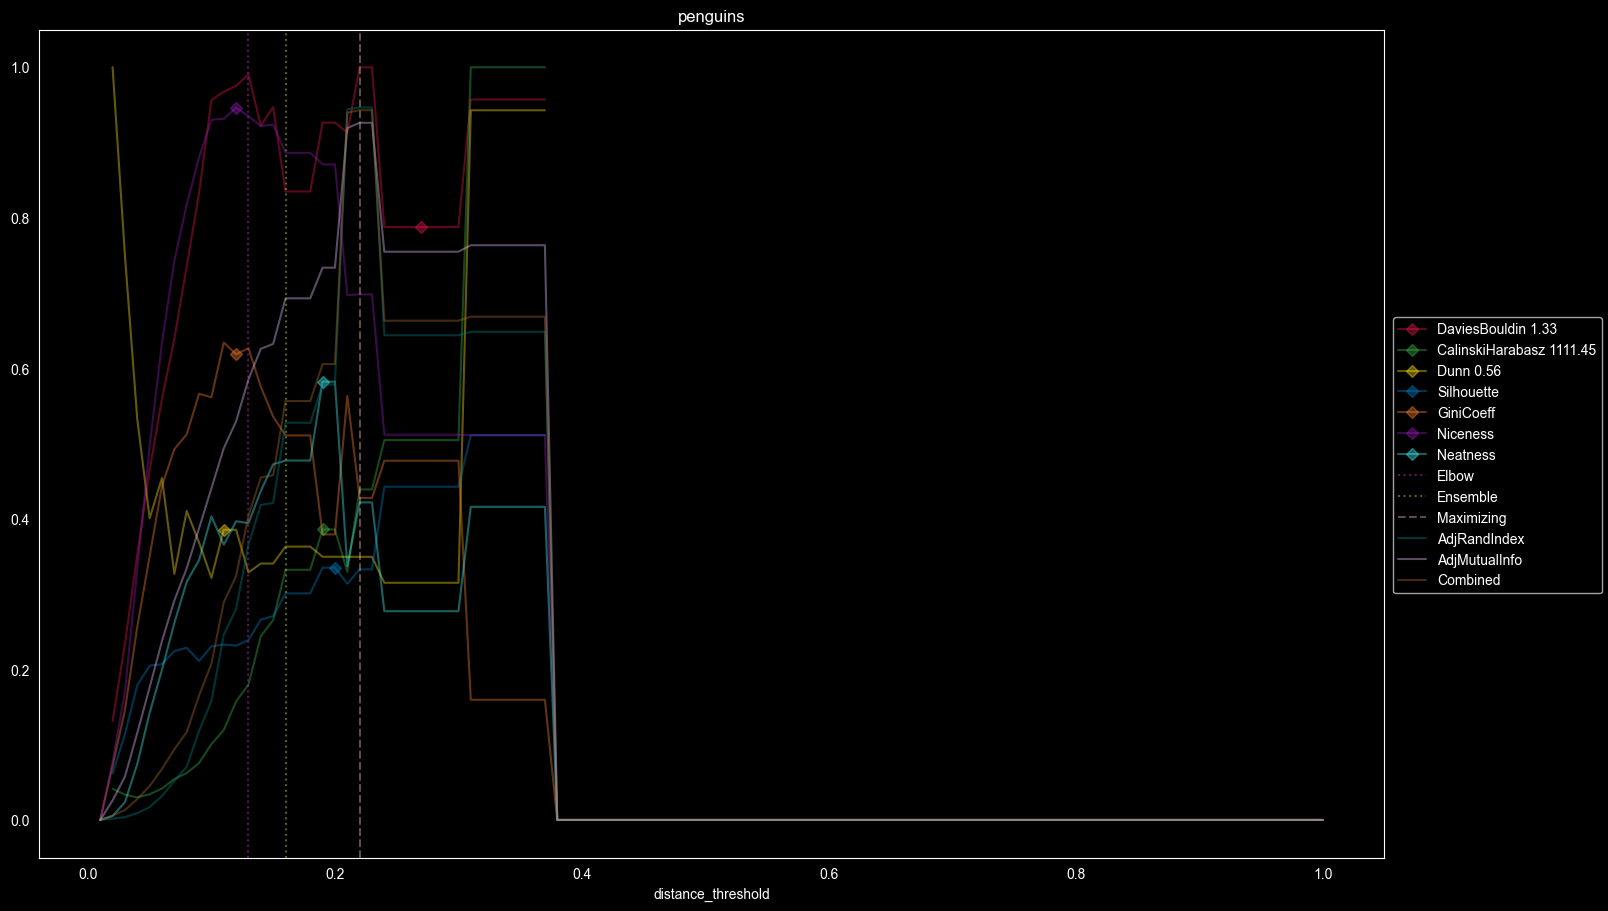

{'Silhouette': 0.3328398142200902, 'Niceness': 0.6982909573948878, 'GiniCoeff': 0.42773109243697477, 'Neatness': 0.42187556561970646, 'sample': {'distance_threshold': 0.22, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 1, 62: 1, 118: 1, 152: 1}, 'DaviesBouldin': 1.3336445240073276, 'CalinskiHarabasz': 488.0436223866292, 'Dunn': 0.19549218895946155, 'AdjRandIndex': 0.9465809308898748, 'AdjMutualInfo': 0.9262724111768521, 'Combined': 0.9430312064358338}
0    146
2    119
1     68
Name: count, dtype: int64
Dataset Summary
n   333.000000
d     7.000000
k     3.000000
e     1.053642
g     0.174790
Name: penguins, dtype: float64


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

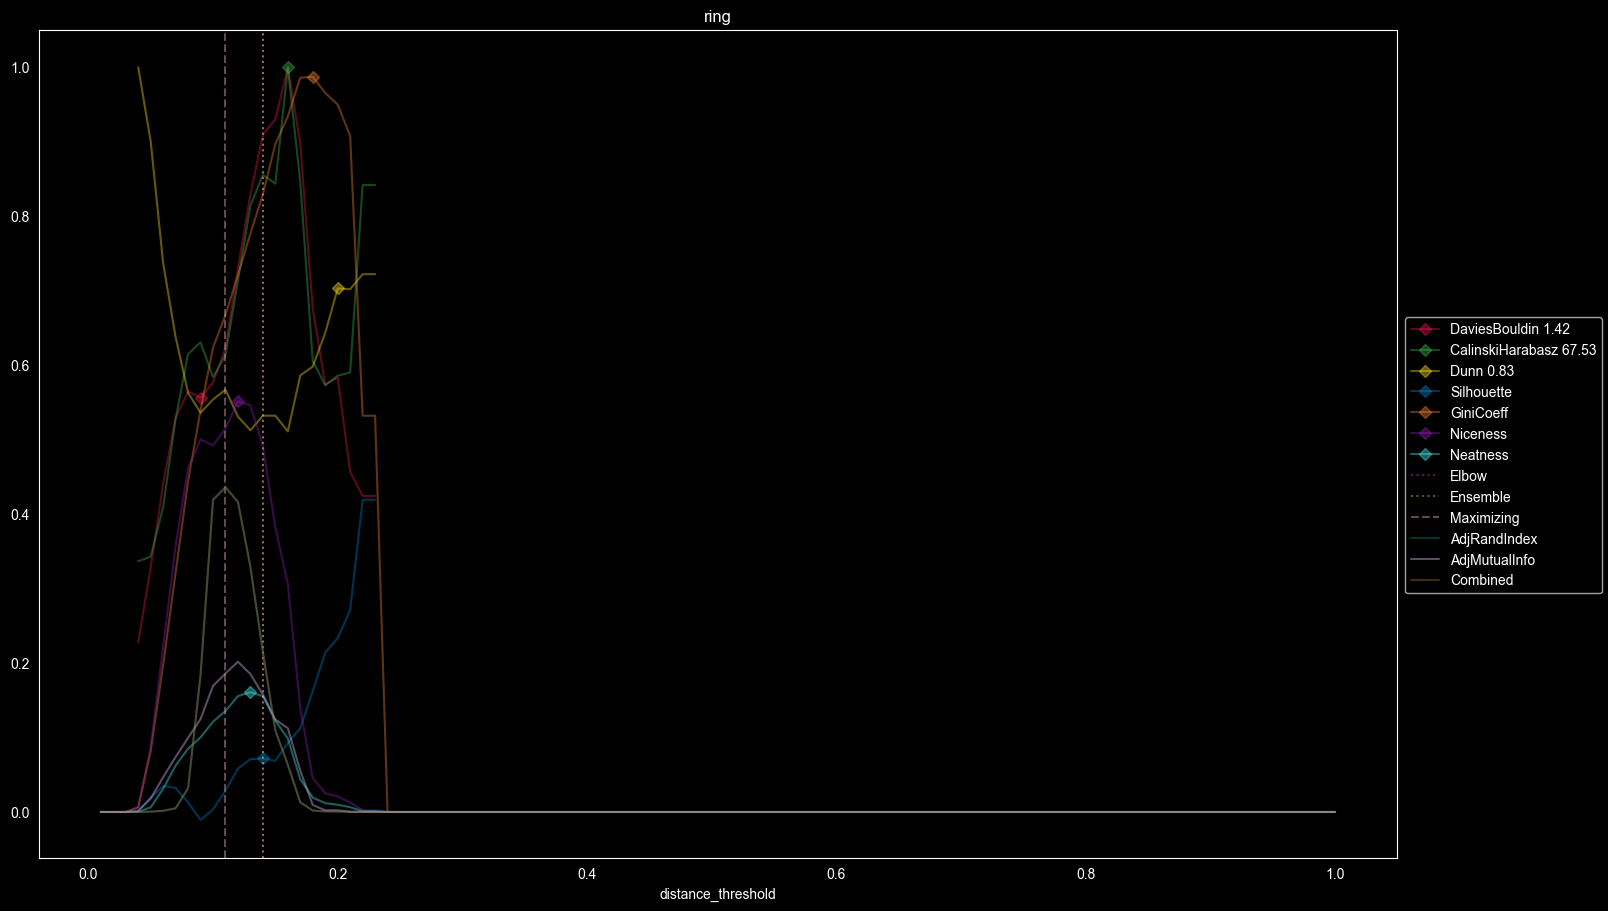

{'Silhouette': 0.02866442822914167, 'Niceness': 0.5150403746782151, 'GiniCoeff': 0.6674110433296219, 'Neatness': 0.13566506253998165, 'sample': {'distance_threshold': 0.11, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 239, 2: 75, 3: 12, 4: 11, 5: 1, 9: 1, 517: 1}, 'DaviesBouldin': 0.8847228992744707, 'CalinskiHarabasz': 41.43995845350522, 'Dunn': 0.46794684181871077, 'AdjRandIndex': 0.43690523536488024, 'AdjMutualInfo': 0.18603782866208782, 'Combined': 0.43556763255654757}
1    505
0    495
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     20.000000
k      2.000000
e      0.693097
g      0.005332
Name: ring, dtype: float64


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

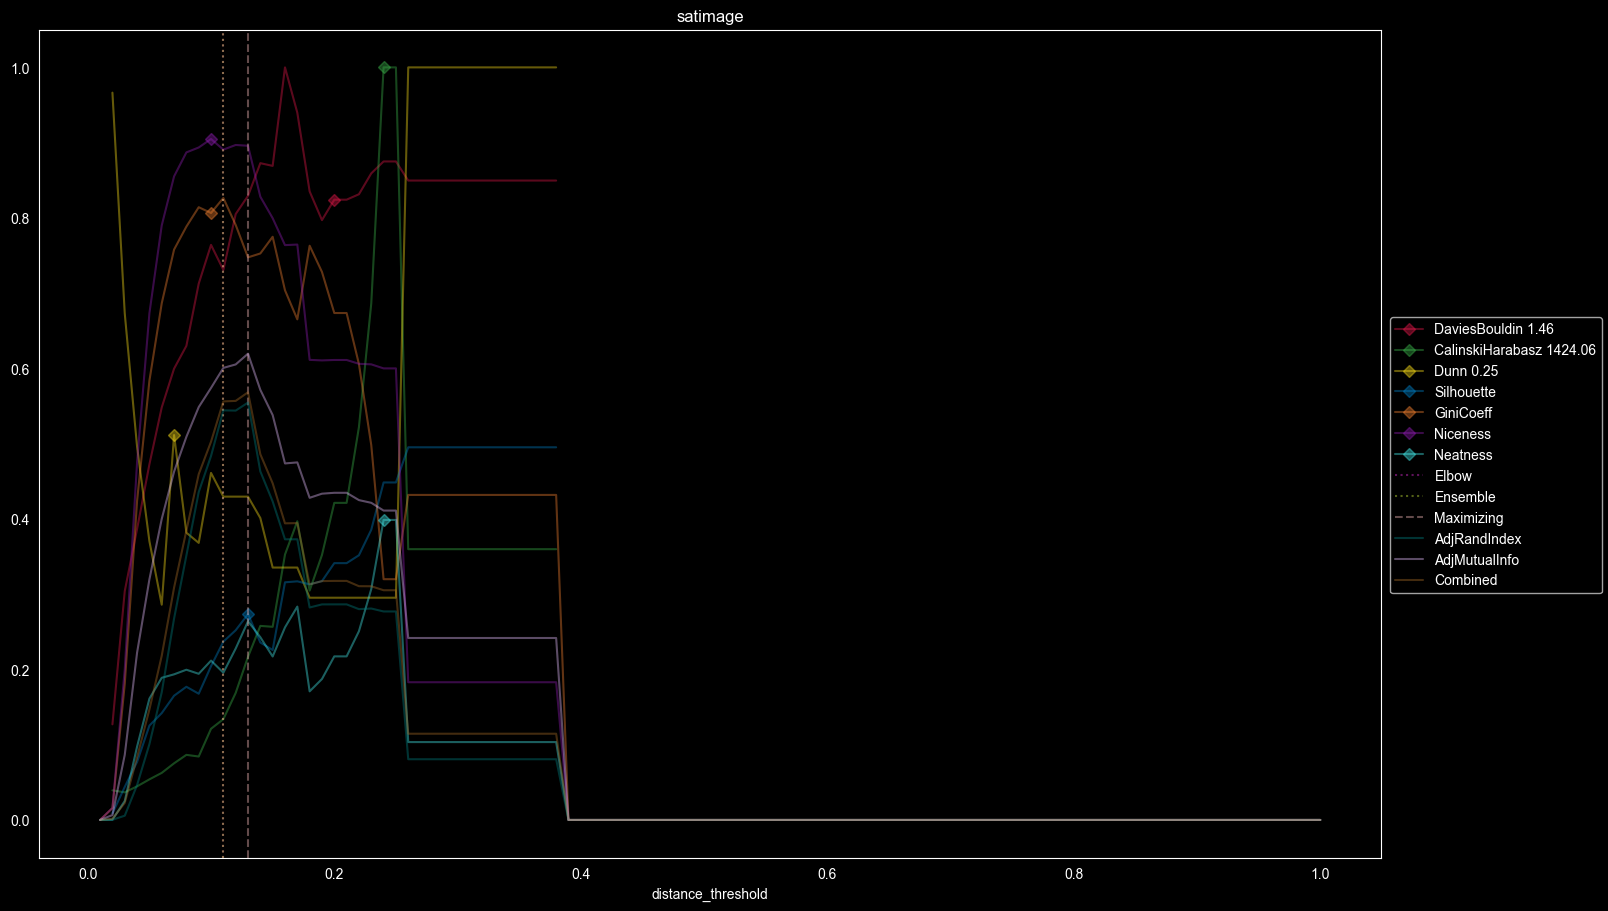

{'Silhouette': 0.27343986959035915, 'Niceness': 0.895829399069208, 'GiniCoeff': 0.7475339909357505, 'Neatness': 0.26396216719648125, 'sample': {'distance_threshold': 0.13, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 3, 2: 1, 3: 2, 5: 6, 6: 3, 11: 1, 47: 1, 60: 1, 63: 1, 79: 1, 128: 1, 130: 1, 204: 1, 219: 1}, 'DaviesBouldin': 1.2126076964144845, 'CalinskiHarabasz': 308.7387724051842, 'Dunn': 0.10825770276913715, 'AdjRandIndex': 0.5545871468068507, 'AdjMutualInfo': 0.6195545483085709, 'Combined': 0.5682584172908172}
1    238
7    235
3    211
5    110
2    109
4     97
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     36.000000
k      6.000000
e      1.720953
g      0.210433
Name: satimage, dtype: float64


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

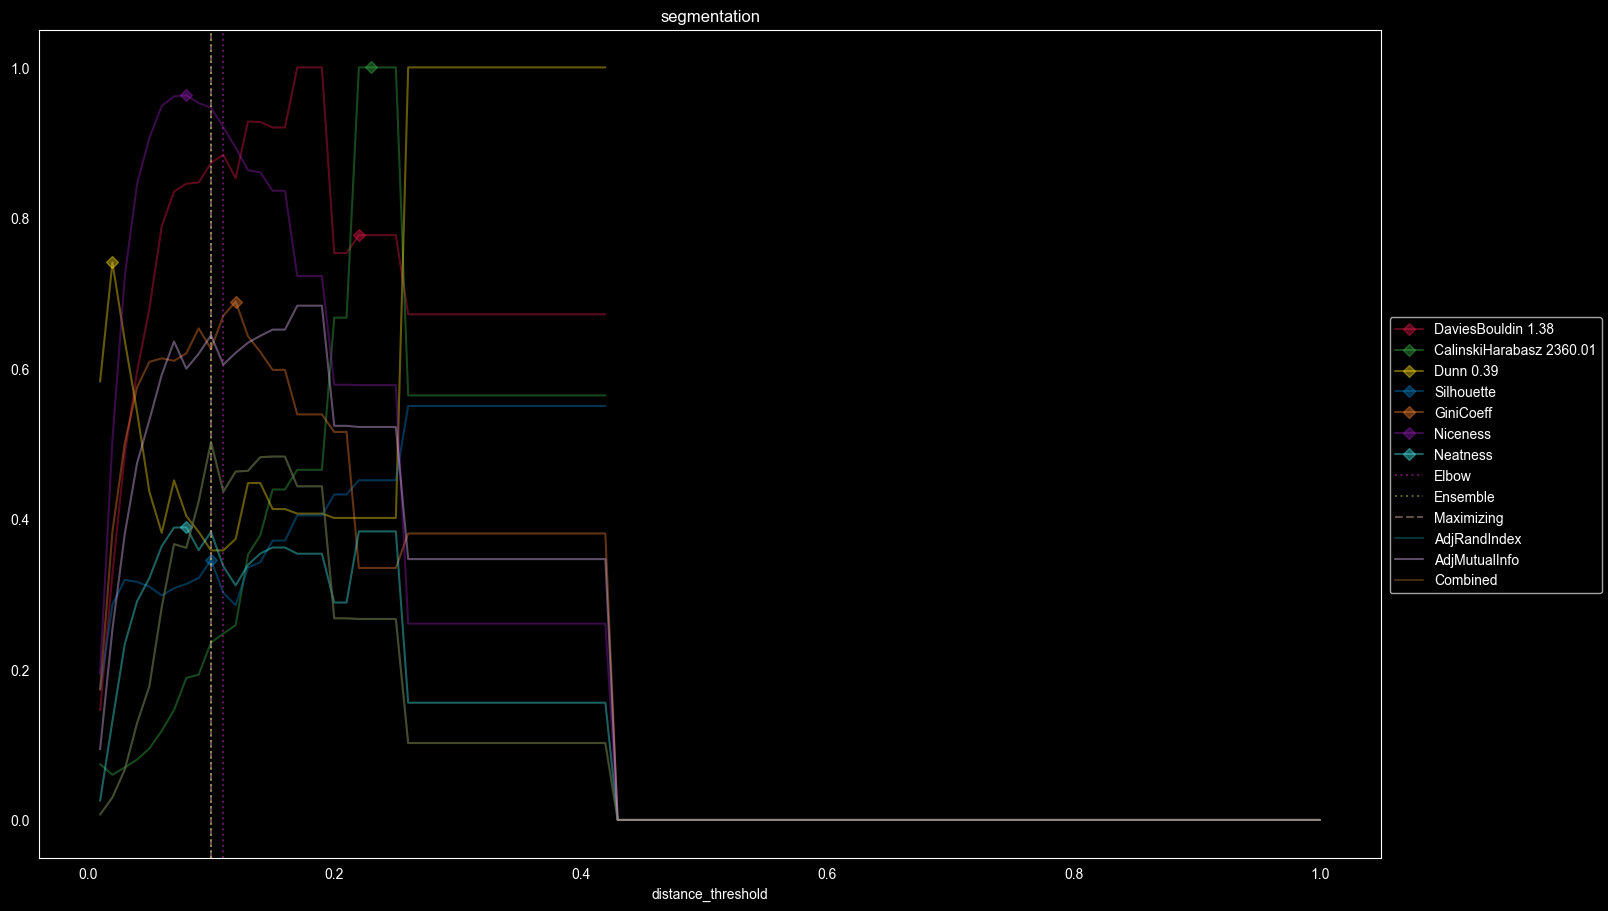

{'Silhouette': 0.3454612679342304, 'Niceness': 0.9464280424996756, 'GiniCoeff': 0.6259237536656892, 'Neatness': 0.3827350545299145, 'sample': {'distance_threshold': 0.1, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 3, 2: 2, 3: 2, 5: 2, 7: 1, 10: 1, 18: 1, 19: 1, 26: 2, 36: 1, 39: 1, 43: 1, 83: 1, 99: 1, 101: 1, 105: 1, 106: 1, 122: 1, 137: 1}, 'DaviesBouldin': 1.2066768121631766, 'CalinskiHarabasz': 556.5100299431747, 'Dunn': 0.14029463072870693, 'AdjRandIndex': 0.5023880466097341, 'AdjMutualInfo': 0.6440153346904408, 'Combined': 0.5025174998951033}
6    143
2    143
4    143
3    143
5    143
1    143
0    142
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     19.000000
k      7.000000
e      1.945907
g      0.000914
Name: segmentation, dtype: float64


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/675 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

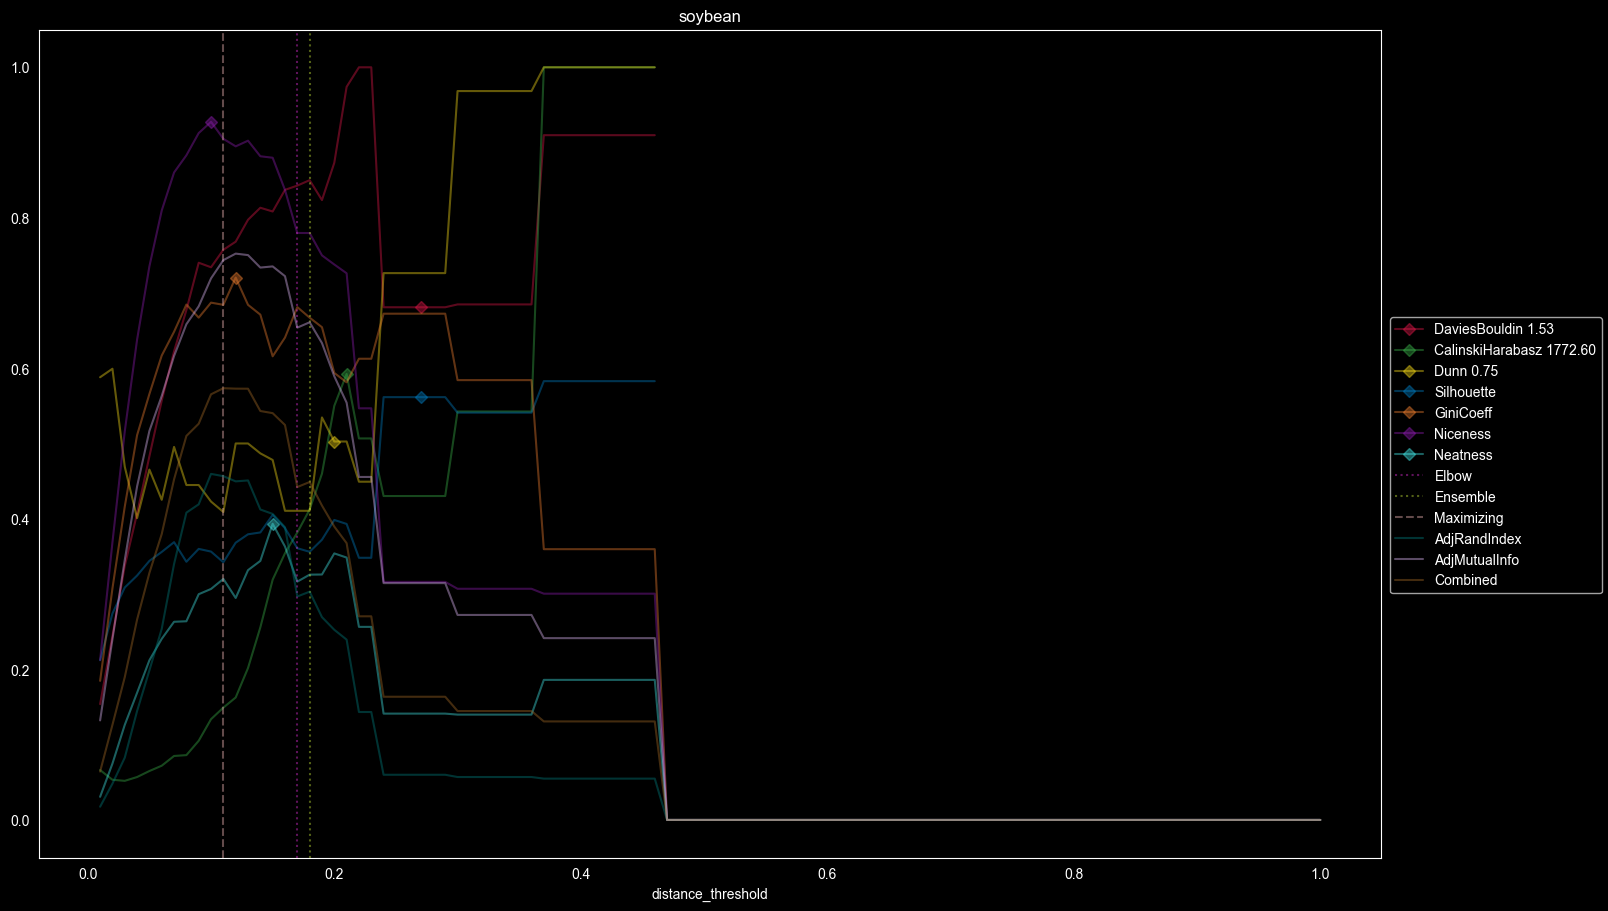

{'Silhouette': 0.34236277301072726, 'Niceness': 0.9049997872167564, 'GiniCoeff': 0.6844196199280945, 'Neatness': 0.3202329051419079, 'sample': {'distance_threshold': 0.11, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 8, 2: 6, 3: 3, 4: 2, 5: 1, 6: 3, 7: 1, 8: 2, 9: 2, 10: 4, 11: 1, 13: 1, 14: 1, 15: 1, 16: 2, 20: 5, 24: 1, 29: 1, 55: 1, 59: 1, 182: 1}, 'DaviesBouldin': 1.1615922493662925, 'CalinskiHarabasz': 264.55263474713917, 'Dunn': 0.30821291703617026, 'AdjRandIndex': 0.4567529990618529, 'AdjMutualInfo': 0.7438031273980823, 'Combined': 0.5736154752095022}
5     92
12    91
1     91
15    88
6     44
2     44
10    20
17    20
14    20
4     20
7     20
3     20
11    20
16    20
18    20
0     16
9     15
8     14
Name: count, dtype: int64
Dataset Summary
n   675.000000
d    35.000000
k    18.000000
e     2.625593
g     0.407115
Name: soybean, dtype: float64


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

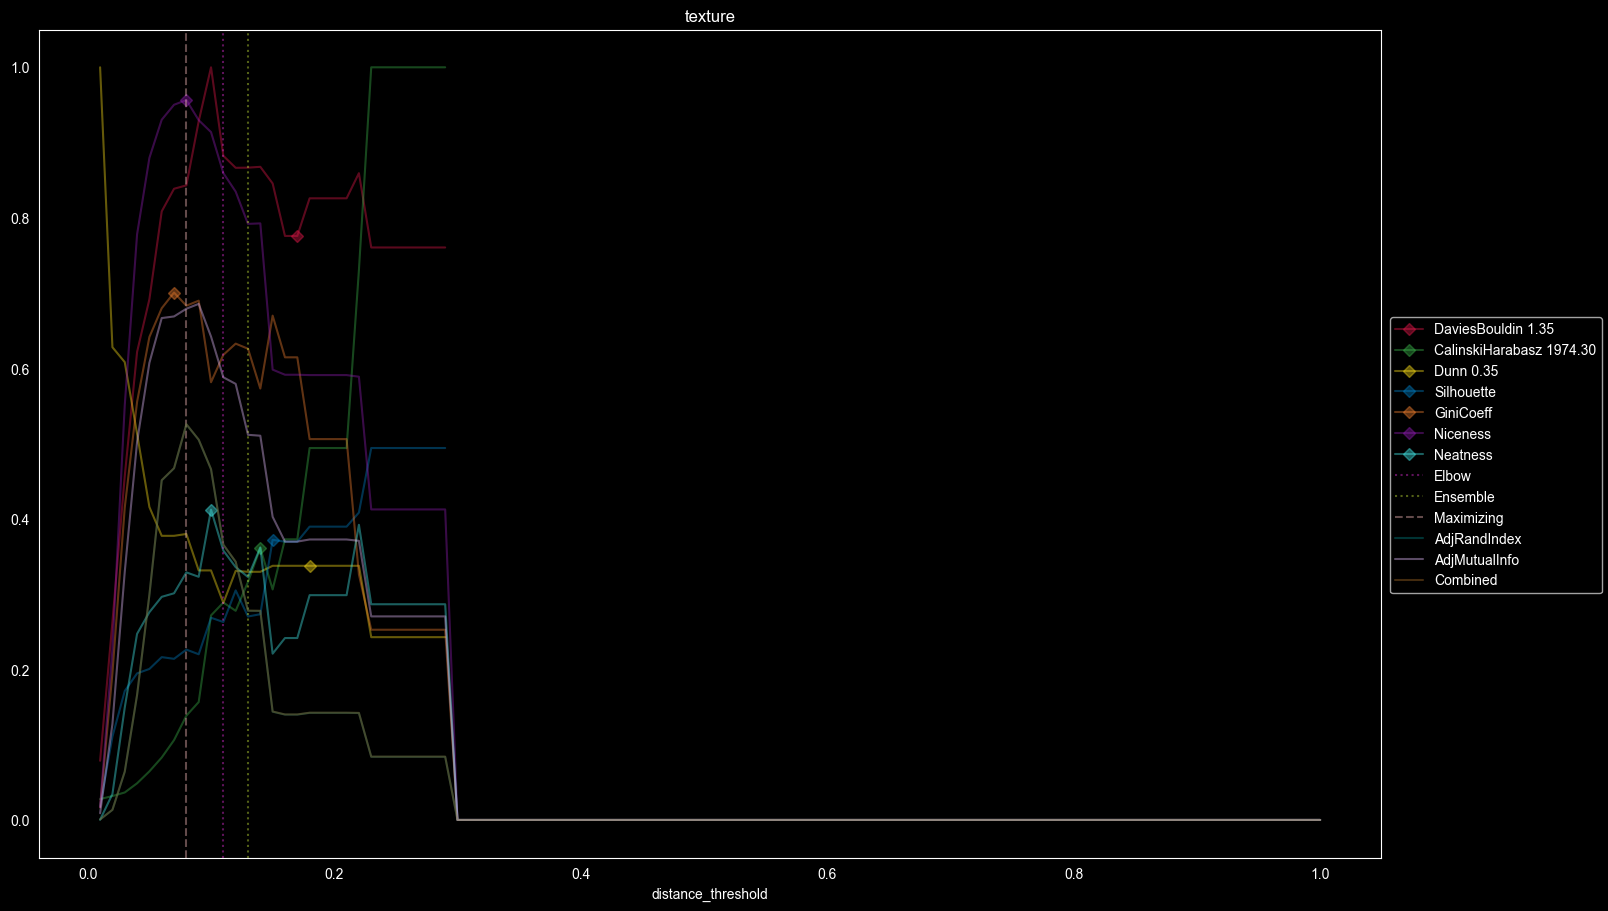

{'Silhouette': 0.22631559537109153, 'Niceness': 0.9564822556640266, 'GiniCoeff': 0.6832311383631031, 'Neatness': 0.32891023176933687, 'sample': {'distance_threshold': 0.08, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 11, 2: 3, 4: 5, 8: 1, 9: 2, 12: 2, 13: 1, 15: 1, 20: 1, 25: 1, 45: 1, 53: 2, 54: 1, 55: 1, 59: 1, 73: 2, 80: 1, 88: 1, 90: 1, 117: 1}, 'DaviesBouldin': 1.1406798156078477, 'CalinskiHarabasz': 273.5136960950189, 'Dunn': 0.13451741344605497, 'AdjRandIndex': 0.5256070617940556, 'AdjMutualInfo': 0.6792290140255633, 'Combined': 0.5257559888217395}
7     91
6     91
2     91
3     91
9     91
14    91
13    91
4     91
10    91
12    91
8     90
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     40.000000
k     11.000000
e      2.397890
g      0.000969
Name: texture, dtype: float64


  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/959 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

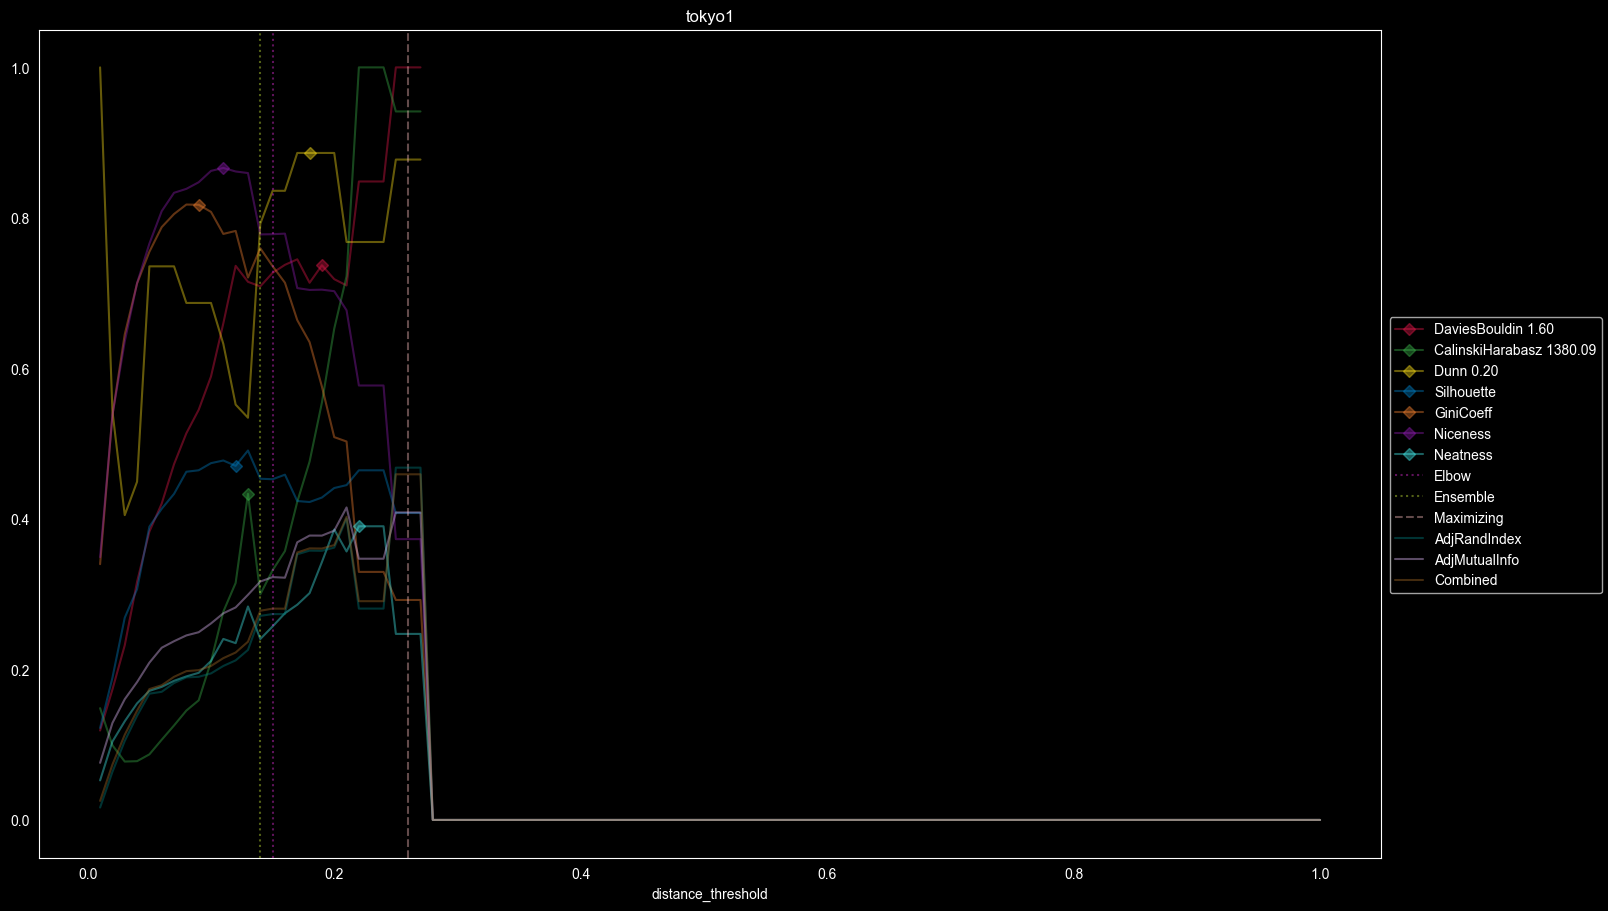

{'Silhouette': 0.4078333297685654, 'Niceness': 0.37313134542006177, 'GiniCoeff': 0.29229525862068967, 'Neatness': 0.2472083968844234, 'sample': {'distance_threshold': 0.26, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {217: 1, 742: 1}, 'DaviesBouldin': 1.598376451051455, 'CalinskiHarabasz': 1299.2609864788458, 'Dunn': 0.17959271793193785, 'AdjRandIndex': 0.46813161453635177, 'AdjMutualInfo': 0.4086319445671108, 'Combined': 0.4592868090705578}
1    613
0    346
Name: count, dtype: int64
Dataset Summary
n   959.000000
d    44.000000
k     2.000000
e     0.653873
g     0.148653
Name: tokyo1, dtype: float64


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

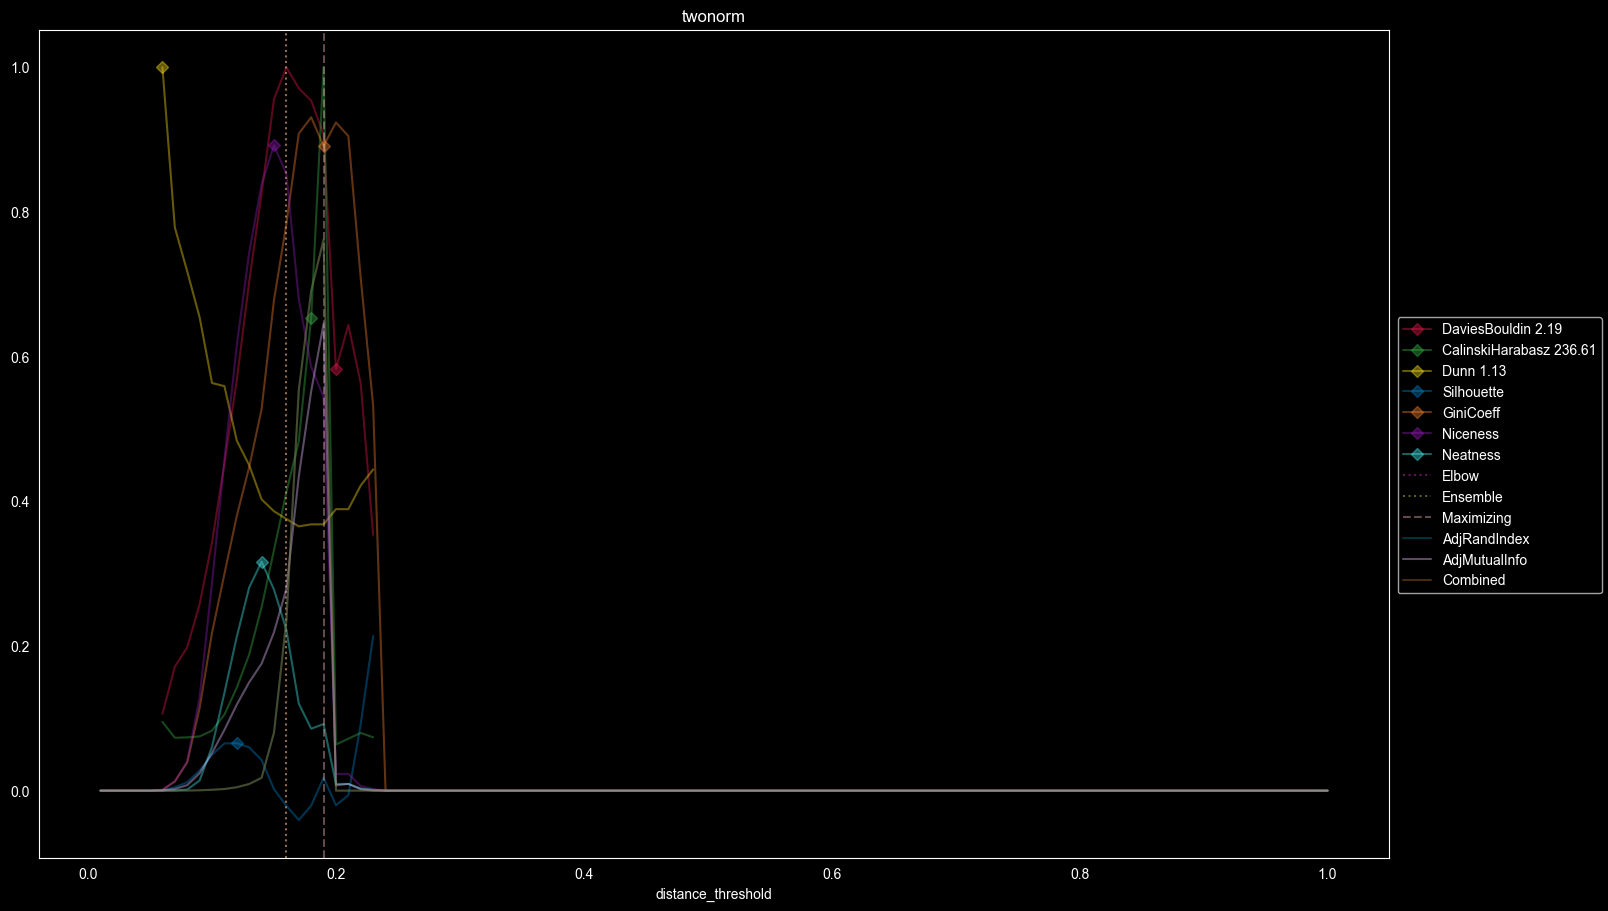

{'Silhouette': 0.017810164196540766, 'Niceness': 0.5444337297479097, 'GiniCoeff': 0.8913315423579353, 'Neatness': 0.09204531303879794, 'sample': {'distance_threshold': 0.19, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 6, 2: 3, 3: 1, 4: 1, 463: 1, 518: 1}, 'DaviesBouldin': 1.9897004535636555, 'CalinskiHarabasz': 236.6084676420363, 'Dunn': 0.4156371216471438, 'AdjRandIndex': 0.761977512584724, 'AdjMutualInfo': 0.6451918734395613, 'Combined': 0.761977512584724}
0    500
1    500
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     20.000000
k      2.000000
e      0.693147
g      0.000000
Name: twonorm, dtype: float64


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

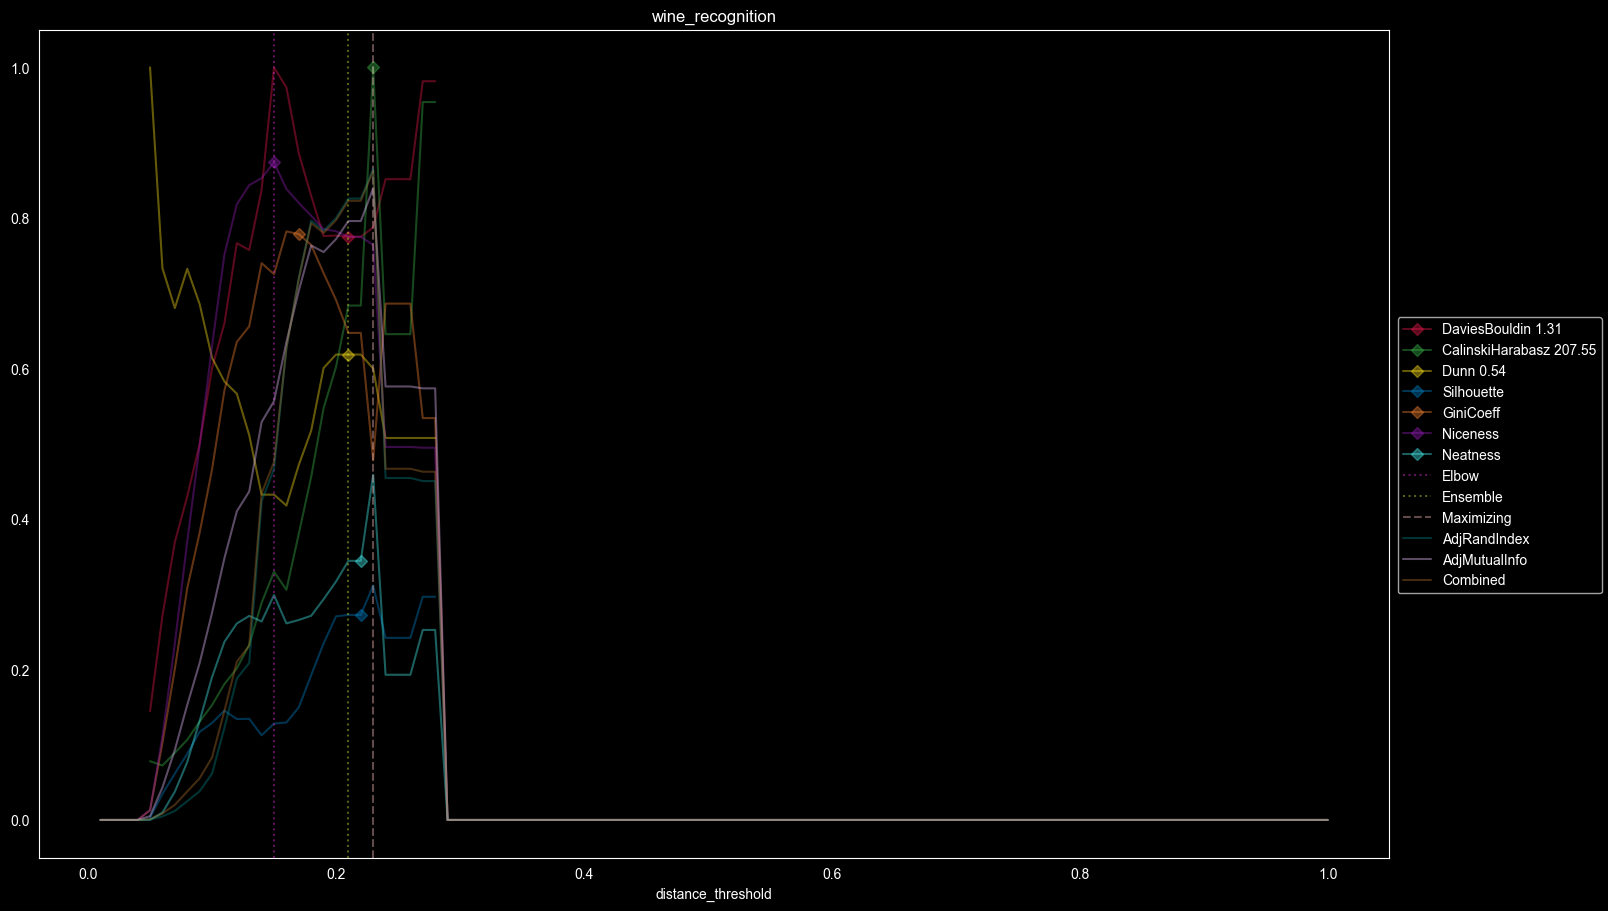

{'Silhouette': 0.3115524014498681, 'Niceness': 0.7639555174228954, 'GiniCoeff': 0.477979797979798, 'Neatness': 0.45874794703543353, 'sample': {'distance_threshold': 0.23, 'linkage': 'average', 'n_clusters': None}, 'counts_dict': {1: 2, 53: 1, 61: 1, 62: 1}, 'DaviesBouldin': 1.0332821878296703, 'CalinskiHarabasz': 207.5470918496055, 'Dunn': 0.3235339555455477, 'AdjRandIndex': 0.8651168482162414, 'AdjMutualInfo': 0.8393073258750644, 'Combined': 0.862518515832399}
2    71
1    59
3    48
Name: count, dtype: int64
Dataset Summary
n   178.000000
d    13.000000
k     3.000000
e     1.086038
g     0.100673
Name: wine_recognition, dtype: float64


In [2]:
# https://github.com/EpistasisLab/pmlb/issues/167
# deprecated = [
#     "cmc",
#     "195_auto_price",
#     "207_autoPrice",
#     "glass",
#     "heart_c",
#     "cleve",
#     "cleveland_nominal",
#     "heart_statlog",
#     "heart_h",
#     "colic",
#     "vote",
#     "wdbc",
#     "australian",
#     "buggyCrx",
#     "crx",
#     "breast_w",
#     "pima",
#     "german",
#     "flare",
#     "car_evaluation",
#     "kr_vs_kp",
#     "294_satellite_image",
#     "197_cpu_act",
#     "227_cpu_small",
#     "562_cpu_small",
#     "1595_poker",
# ]

classification_dataset_names = [
    "agaricus_lepiota",
    "analcatdata_authorship",
    "breast",
    "breast_cancer_wisconsin",
    "collins",
    "confidence",
    "dermatology",
    "ecoli",
    "house_votes_84",
    "iris",
    "kddcup",
    "mfeat_factors",
    "mfeat_fourier",
    "mfeat_karhunen",
    "mfeat_morphological",
    "mfeat_pixel",
    "new_thyroid",
    "optdigits",
    "pendigits",
    "penguins",
    "ring",
    "satimage",
    "segmentation",
    "soybean",
    "texture",
    "tokyo1",
    'twonorm',
    "wine_recognition",
]

max_size = 1000

max_muti = 0
max_rand = 0
max_combo = 0
results = 0
ranks = 0
d = {}
r = {}

for classification_dataset in classification_dataset_names:
    X, y = fetch_data(
        classification_dataset, return_X_y=True, local_cache_dir="/Users/temp/pmlb_data"
    )
    if len(X) > max_size:
        _, X, _, y = train_test_split(X, y, test_size=max_size, random_state=42, stratify=y)
    X = pd.DataFrame(X)
    y = pd.Series(y)
    if X.shape[1] > 2:
        vis = pd.DataFrame(
            umap.UMAP(random_state=42).fit_transform(X), columns=list("ab"), index=X.index
        )
    elif X.shape[1] == 2:
        vis = X.copy()
        vis.columns = list("ab")
    else:
        vis = X.copy()
        vis.columns = ["a"]
        vis["b"] = 0.0
    kwargs = dict(
        df=X,
        title=f"{classification_dataset}",
        actual=y,
    )
    if "precomputed" in inspect.getfullargspec(optimize).args:
        kwargs["precomputed"] = True
        kwargs["chunksize"] = 20
    clusters, (score, res) = optimize(**kwargs)
    # print(res)
    # plt.title(f"{classification_dataset} - Actual")
    # scatterplot(vis, x="a", y="b", hue=y, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    # plt.title(f"{classification_dataset} - Best Possible Prediction")
    # scatterplot(vis, x="a", y="b", hue=clusters, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    rank = res.rank(ascending=False)
    max_muti += res.max_muti
    max_rand += res.max_rand
    max_combo += res.max_combo
    results += res
    ranks += rank
    res = res.Combined
    res["n"], res["d"] = X.shape
    res["k"] = len(np.unique(y))
    _, counts = np.unique(y, return_counts=True)
    res["e"] = entropy(counts)
    res["g"] = gini_coefficient(counts)
    res.name = classification_dataset
    d[classification_dataset] = res
    res.index.name = "Dataset Summary"
    print(res[["n", "d", "k", "e", "g"]])
    res.index.name = "Metric"
    rank = rank.Combined
    rank["n"], rank["d"], rank["k"], rank["e"], rank["g"] = res[["n", "d", "k", "e", "g"]]
    r[classification_dataset] = rank

denom = len(classification_dataset_names)

max_muti /= denom
max_rand /= denom
max_combo /= denom
results /= denom
ranks /= denom
df = pd.DataFrame(d).T
df_rank = pd.DataFrame(r).T

# Results

In [3]:
print("Average Mutual Information:", max_muti)
print("Average Rand Index:", max_rand)
print("Average Combined:", max_combo)

Average Mutual Information: 0.6765832234321828
Average Rand Index: 0.6454853993501375
Average Combined: 0.6456160234013941


### Results across all datasets
- Averages per metric broken down by Mutual Information, Rand Index, and Combined
- Summary statistics
- Correlation matrix
- Mann-Whitney U test

### Raw Scores

In [4]:
results

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                    0.000000      0.000000  0.000000
DaviesBouldin          0.498094      0.417575  0.423031
CalinskiHarabasz       0.565239      0.465368  0.472324
Dunn                   0.448447      0.370134  0.374294
Silhouette             0.547726      0.454821  0.459008
GiniCoeff              0.559417      0.476941  0.479306
Niceness               0.545782      0.429209  0.443637
Neatness               0.581443      0.475234  0.486323
Elbow                  0.557129      0.460107  0.468305
Ensemble               0.596333      0.518347  0.522509

In [5]:
df.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean    0.000000       0.423031          0.472324  0.374294    0.459008   
std     0.000000       0.273107          0.237152  0.292821    0.254853   
min     0.000000       0.000000          0.063574  0.000004    0.004695   
25%     0.000000       0.206148          0.275230  0.128029    0.220538   
50%     0.000000       0.402145          0.397555  0.353164    0.527976   
75%     0.000000       0.634573          0.658753  0.612360    0.670637   
max     0.000000       0.937141          0.909557  0.960302    0.909557   

Metric  GiniCoeff  Niceness  Neatness     Elbow  Ensemble           n  \
count   28.000000 28.000000 28.000000 28.000000 28.000000   28.000000   
mean     0.479306  0.443637  0.486323  0.468305  0.522509  725.142857   
std      0.198664  0.190398  0.228958  0.148803  0.201484  336.290518   
min      0.001874  0.080221  0.017765  0.214668  0.206577   72.000000   
25%      0.427234  0.337498  0.314291  0.357914  0.364650  417.750000   
50%      0.515520  0.444338  0.491949  0.458982  0.547220  979.500000   
75%      0.584971  0.604890  0.635531  0.594233  0.670637 1000.000000   
max      0.773478  0.813932  0.909557  0.681200  0.960302 1000.000000   

Metric          d         k         e         g  
count   28.000000 28.000000 28.000000 28.000000  
mean    42.178571  6.535714  1.543618  0.144173  
std     56.517486  4.307462  0.715935  0.195110  
min      3.000000  2.000000  0.644154  0.000000  
25%     12.250000  2.750000  0.789399  0.000000  
50%     22.500000  6.000000  1.545430  0.061001  
75%     41.750000 10.000000  2.302585  0.226015  
max    240.000000 18.000000  2.625593  0.831584

In [6]:
df.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000          0.593401  0.681547    0.732395   
CalinskiHarabasz  NaN       0.593401          1.000000  0.749200    0.587966   
Dunn              NaN       0.681547          0.749200  1.000000    0.526224   
Silhouette        NaN       0.732395          0.587966  0.526224    1.000000   
GiniCoeff         NaN       0.465359          0.724020  0.511171    0.470050   
Niceness          NaN       0.307376          0.007177  0.260455    0.185950   
Neatness          NaN       0.694670          0.464985  0.571719    0.606878   
Elbow             NaN       0.509038          0.292695  0.457791    0.518266   
Ensemble          NaN       0.703424          0.623840  0.682236    0.775660   
n                 NaN      -0.389185         -0.471414 -0.382903   -0.243778   
d                 NaN      -0.079980         -0.256818 -0.283293    0.186078   
k                 NaN      -0.191496         -0.335177 -0.187301   -0.203690   
e                 NaN      -0.253016         -0.470022 -0.289231   -0.214842   
g                 NaN       0.467397          0.480485  0.533758    0.335688   

Metric            GiniCoeff  Niceness  Neatness     Elbow  Ensemble         n  \
Metric                                                                          
BIC                     NaN       NaN       NaN       NaN       NaN       NaN   
DaviesBouldin      0.465359  0.307376  0.694670  0.509038  0.703424 -0.389185   
CalinskiHarabasz   0.724020  0.007177  0.464985  0.292695  0.623840 -0.471414   
Dunn               0.511171  0.260455  0.571719  0.457791  0.682236 -0.382903   
Silhouette         0.470050  0.185950  0.606878  0.518266  0.775660 -0.243778   
GiniCoeff          1.000000  0.278883  0.394115  0.529723  0.631735 -0.326824   
Niceness           0.278883  1.000000  0.576567  0.754318  0.504701  0.128109   
Neatness           0.394115  0.576567  1.000000  0.617666  0.829402 -0.167769   
Elbow              0.529723  0.754318  0.617666  1.000000  0.725791 -0.066319   
Ensemble           0.631735  0.504701  0.829402  0.725791  1.000000 -0.198757   
n                 -0.326824  0.128109 -0.167769 -0.066319 -0.198757  1.000000   
d                 -0.021500  0.285357  0.264240  0.390858  0.266538  0.412614   
k                  0.017764  0.576906  0.171126  0.346002  0.041900  0.315329   
e                 -0.087607  0.530289  0.102377  0.390635  0.009539  0.282349   
g                  0.445822  0.206222  0.373602  0.210437  0.444857 -0.214121   

Metric                   d         k         e         g  
Metric                                                    
BIC                    NaN       NaN       NaN       NaN  
DaviesBouldin    -0.079980 -0.191496 -0.253016  0.467397  
CalinskiHarabasz -0.256818 -0.335177 -0.470022  0.480485  
Dunn             -0.283293 -0.187301 -0.289231  0.533758  
Silhouette        0.186078 -0.203690 -0.214842  0.335688  
GiniCoeff        -0.021500  0.017764 -0.087607  0.445822  
Niceness          0.285357  0.576906  0.530289  0.206222  
Neatness          0.264240  0.171126  0.102377  0.373602  
Elbow             0.390858  0.346002  0.390635  0.210437  
Ensemble          0.266538  0.041900  0.009539  0.444857  
n                 0.412614  0.315329  0.282349 -0.214121  
d                 1.000000  0.337486  0.395964 -0.184243  
k                 0.337486  1.000000  0.893731  0.154868  
e                 0.395964  0.893731  1.000000 -0.187048  
g                -0.184243  0.154868 -0.187048  1.000000

In [7]:
columns = df.columns[:-5]
pd.DataFrame([[mannwhitneyu(df[x], df[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)

Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.486138 0.566260   
CalinskiHarabasz 0.000000       0.486138          1.000000 0.179016   
Dunn             0.000000       0.566260          0.179016 1.000000   
Silhouette       0.000000       0.599996          0.724582 0.234783   
GiniCoeff        0.000000       0.337729          0.831302 0.125481   
Niceness         0.000000       0.694105          0.724601 0.254751   
Neatness         0.000000       0.358771          0.793151 0.113778   
Elbow            0.000000       0.481031          0.941217 0.140255   
Ensemble         0.000000       0.151588          0.376208 0.053144   

Metric            Silhouette  GiniCoeff  Niceness  Neatness    Elbow  Ensemble  
Metric                                                                          
BIC                 0.000000   0.000000  0.000000  0.000000 0.000000  0.000000  
DaviesBouldin       0.599996   0.337729  0.694105  0.358771 0.481031  0.151588  
CalinskiHarabasz    0.724582   0.831302  0.724601  0.793151 0.941217  0.376208  
Dunn                0.234783   0.125481  0.254751  0.113778 0.140255  0.053144  
Silhouette          1.000000   0.993463  0.706245  0.658129 0.934696  0.367384  
GiniCoeff           0.993463   1.000000  0.350237  0.993463 0.640471  0.544300  
Niceness            0.706245   0.350237  1.000000  0.560733 0.600009  0.166133  
Neatness            0.658129   0.993463  0.560733  1.000000 0.793172  0.617205  
Elbow               0.934696   0.640471  0.600009  0.793172 1.000000  0.298012  
Ensemble            0.367384   0.544300  0.166133  0.617205 0.298012  1.000000

### Ranks

In [8]:
ranks

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                   10.000000     10.000000 10.000000
DaviesBouldin          5.339286      5.303571  5.339286
CalinskiHarabasz       5.000000      4.892857  4.892857
Dunn                   5.928571      5.785714  5.750000
Silhouette             4.553571      4.767857  4.767857
GiniCoeff              5.732143      5.625000  5.625000
Niceness               5.178571      4.964286  5.000000
Neatness               4.321429      4.571429  4.571429
Elbow                  4.982143      5.017857  4.982143
Ensemble               3.964286      4.071429  4.071429

In [9]:
df_rank.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean   10.000000       5.339286          4.892857  5.750000    4.767857   
std     0.000000       2.691047          2.554434  2.730147    2.518385   
min    10.000000       1.000000          1.000000  1.000000    1.000000   
25%    10.000000       3.000000          2.000000  3.875000    2.500000   
50%    10.000000       6.000000          5.000000  6.000000    4.500000   
75%    10.000000       7.125000          7.000000  8.625000    7.000000   
max    10.000000       9.000000          8.500000  9.000000    9.000000   

Metric  GiniCoeff  Niceness  Neatness     Elbow  Ensemble           n  \
count   28.000000 28.000000 28.000000 28.000000 28.000000   28.000000   
mean     5.625000  5.000000  4.571429  4.982143  4.071429  725.142857   
std      2.626873  3.042903  2.448409  2.262750  1.719788  336.290518   
min      1.000000  1.000000  1.000000  1.000000  1.500000   72.000000   
25%      3.375000  2.000000  2.375000  3.375000  2.500000  417.750000   
50%      6.250000  5.250000  4.250000  4.250000  4.250000  979.500000   
75%      7.625000  8.000000  6.125000  7.000000  5.000000 1000.000000   
max      9.000000  9.000000  9.000000  9.000000  8.000000 1000.000000   

Metric          d         k         e         g  
count   28.000000 28.000000 28.000000 28.000000  
mean    42.178571  6.535714  1.543618  0.144173  
std     56.517486  4.307462  0.715935  0.195110  
min      3.000000  2.000000  0.644154  0.000000  
25%     12.250000  2.750000  0.789399  0.000000  
50%     22.500000  6.000000  1.545430  0.061001  
75%     41.750000 10.000000  2.302585  0.226015  
max    240.000000 18.000000  2.625593  0.831584

In [10]:
df_rank.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000          0.051281  0.294277   -0.083586   
CalinskiHarabasz  NaN       0.051281          1.000000  0.305368   -0.029917   
Dunn              NaN       0.294277          0.305368  1.000000   -0.160930   
Silhouette        NaN      -0.083586         -0.029917 -0.160930    1.000000   
GiniCoeff         NaN      -0.494789          0.055885 -0.360855   -0.107422   
Niceness          NaN      -0.357317         -0.557493 -0.508238   -0.318985   
Neatness          NaN       0.108610         -0.034262 -0.016622   -0.263004   
Elbow             NaN      -0.338065         -0.577040 -0.384451    0.023619   
Ensemble          NaN      -0.307535         -0.297485 -0.285945    0.038176   
n                 NaN       0.242882          0.445761  0.169448   -0.029544   
d                 NaN       0.123660          0.409194  0.238531   -0.196030   
k                 NaN       0.185034          0.560807  0.274786    0.262835   
e                 NaN       0.241867          0.700573  0.338922    0.119848   
g                 NaN      -0.298891         -0.168945 -0.312338    0.139611   

Metric            GiniCoeff  Niceness  Neatness     Elbow  Ensemble         n  \
Metric                                                                          
BIC                     NaN       NaN       NaN       NaN       NaN       NaN   
DaviesBouldin     -0.494789 -0.357317  0.108610 -0.338065 -0.307535  0.242882   
CalinskiHarabasz   0.055885 -0.557493 -0.034262 -0.577040 -0.297485  0.445761   
Dunn              -0.360855 -0.508238 -0.016622 -0.384451 -0.285945  0.169448   
Silhouette        -0.107422 -0.318985 -0.263004  0.023619  0.038176 -0.029544   
GiniCoeff          1.000000  0.139005 -0.418934  0.084508  0.133222  0.223759   
Niceness           0.139005  1.000000 -0.069597  0.555394  0.047772 -0.398927   
Neatness          -0.418934 -0.069597  1.000000 -0.312295  0.042723 -0.034874   
Elbow              0.084508  0.555394 -0.312295  1.000000 -0.021075 -0.376698   
Ensemble           0.133222  0.047772  0.042723 -0.021075  1.000000 -0.358542   
n                  0.223759 -0.398927 -0.034874 -0.376698 -0.358542  1.000000   
d                  0.177590 -0.104880 -0.140613 -0.267576 -0.426337  0.412614   
k                 -0.130520 -0.616003 -0.117896 -0.316278 -0.070352  0.315329   
e                 -0.067265 -0.666689 -0.029571 -0.511886 -0.134630  0.282349   
g                 -0.113169  0.330227 -0.110300  0.507588  0.087783 -0.214121   

Metric                   d         k         e         g  
Metric                                                    
BIC                    NaN       NaN       NaN       NaN  
DaviesBouldin     0.123660  0.185034  0.241867 -0.298891  
CalinskiHarabasz  0.409194  0.560807  0.700573 -0.168945  
Dunn              0.238531  0.274786  0.338922 -0.312338  
Silhouette       -0.196030  0.262835  0.119848  0.139611  
GiniCoeff         0.177590 -0.130520 -0.067265 -0.113169  
Niceness         -0.104880 -0.616003 -0.666689  0.330227  
Neatness         -0.140613 -0.117896 -0.029571 -0.110300  
Elbow            -0.267576 -0.316278 -0.511886  0.507588  
Ensemble         -0.426337 -0.070352 -0.134630  0.087783  
n                 0.412614  0.315329  0.282349 -0.214121  
d                 1.000000  0.337486  0.395964 -0.184243  
k                 0.337486  1.000000  0.893731  0.154868  
e                 0.395964  0.893731  1.000000 -0.187048  
g                -0.184243  0.154868 -0.187048  1.000000

In [11]:
pd.DataFrame([[mannwhitneyu(df_rank[x], df_rank[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)


Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.532183 0.499636   
CalinskiHarabasz 0.000000       0.532183          1.000000 0.208545   
Dunn             0.000000       0.499636          0.208545 1.000000   
Silhouette       0.000000       0.425333          0.862922 0.145269   
GiniCoeff        0.000000       0.663067          0.274576 0.729574   
Niceness         0.000000       0.723743          0.850074 0.303101   
Neatness         0.000000       0.270547          0.723570 0.099831   
Elbow            0.000000       0.593216          0.856573 0.242196   
Ensemble         0.000000       0.041203          0.171028 0.030285   

Metric            Silhouette  GiniCoeff  Niceness  Neatness    Elbow  Ensemble  
Metric                                                                          
BIC                 0.000000   0.000000  0.000000  0.000000 0.000000  0.000000  
DaviesBouldin       0.425333   0.663067  0.723743  0.270547 0.593216  0.041203  
CalinskiHarabasz    0.862922   0.274576  0.850074  0.723570 0.856573  0.171028  
Dunn                0.145269   0.729574  0.303101  0.099831 0.242196  0.030285  
Silhouette          1.000000   0.208725  0.779961  0.798842 0.711276  0.314518  
GiniCoeff           0.208725   1.000000  0.537529  0.118537 0.308261  0.015269  
Niceness            0.779961   0.537529  1.000000  0.760977 0.960692  0.295964  
Neatness            0.798842   0.118537  0.760977  1.000000 0.434813  0.494219  
Elbow               0.711276   0.308261  0.960692  0.434813 1.000000  0.216116  
Ensemble            0.314518   0.015269  0.295964  0.494219 0.216116  1.000000